# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [52]:
%pip install pandas
%pip install "SQLAlchemy==1.4.46"

Note: you may need to restart the kernel to use updated packages.
                                              0.0/1.6 MB ? eta -:--:--
     ---------                                0.4/1.6 MB 7.6 MB/s eta 0:00:01
     -------------------                      0.8/1.6 MB 8.1 MB/s eta 0:00:01
     -----------------------------            1.1/1.6 MB 8.1 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.6 MB 8.3 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.13
    Uninstalling SQLAlchemy-2.0.13:
      Successfully uninstalled SQLAlchemy-2.0.13
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Louis\\Documents\\Privat\\Uni\\SS 2023\\AMSE\\amse\\venv\\Lib\\site-packages\\~qlalchemy\\cyextension\\collections.cp311-win_amd64.pyd'
Check the permissions.



## Macro visualization

### Power data
We can see solar power generation coming and going every year. This is most likely due to the seasons (summer vs winter).
Solar capacity is slowly increasing over time. Wind capacity is steadily increasing but has flattened off since 2019. Unlike solar, wind
generation seems to increase with the capacity. Wind power is also generated when solar power isn't and vice-versa.

In [3]:
import pandas as pd

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# # Remove hours and minutes from data -> we are only interested in the day
# power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Convert the "cet_cest_timestamp" column to datetime if it's not already
power_df["cet_cest_timestamp"] = pd.to_datetime(power_df["cet_cest_timestamp"])

# Set "cet_cest_timestamp" as the index
power_df.set_index("cet_cest_timestamp", inplace=True)

# Group by month and calculate the mean
power_df = power_df.groupby(pd.Grouper(freq="M")).mean().reset_index()

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
# power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()
# power_df = power_df.groupby(pd.Grouper(key="cet_cest_timestamp", freq="M")).mean().reset_index()

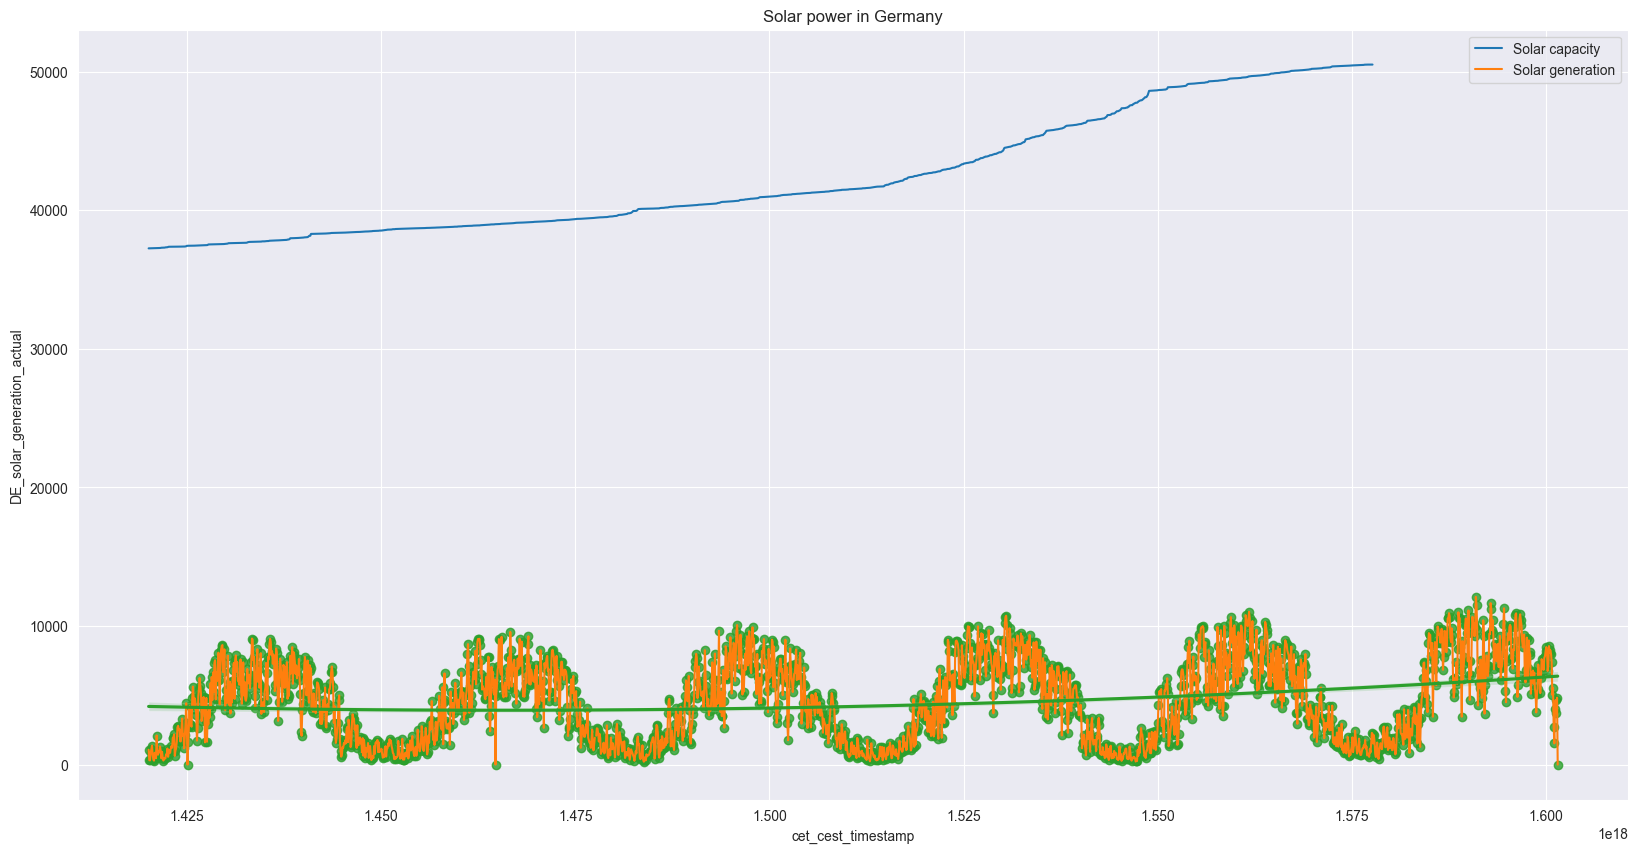

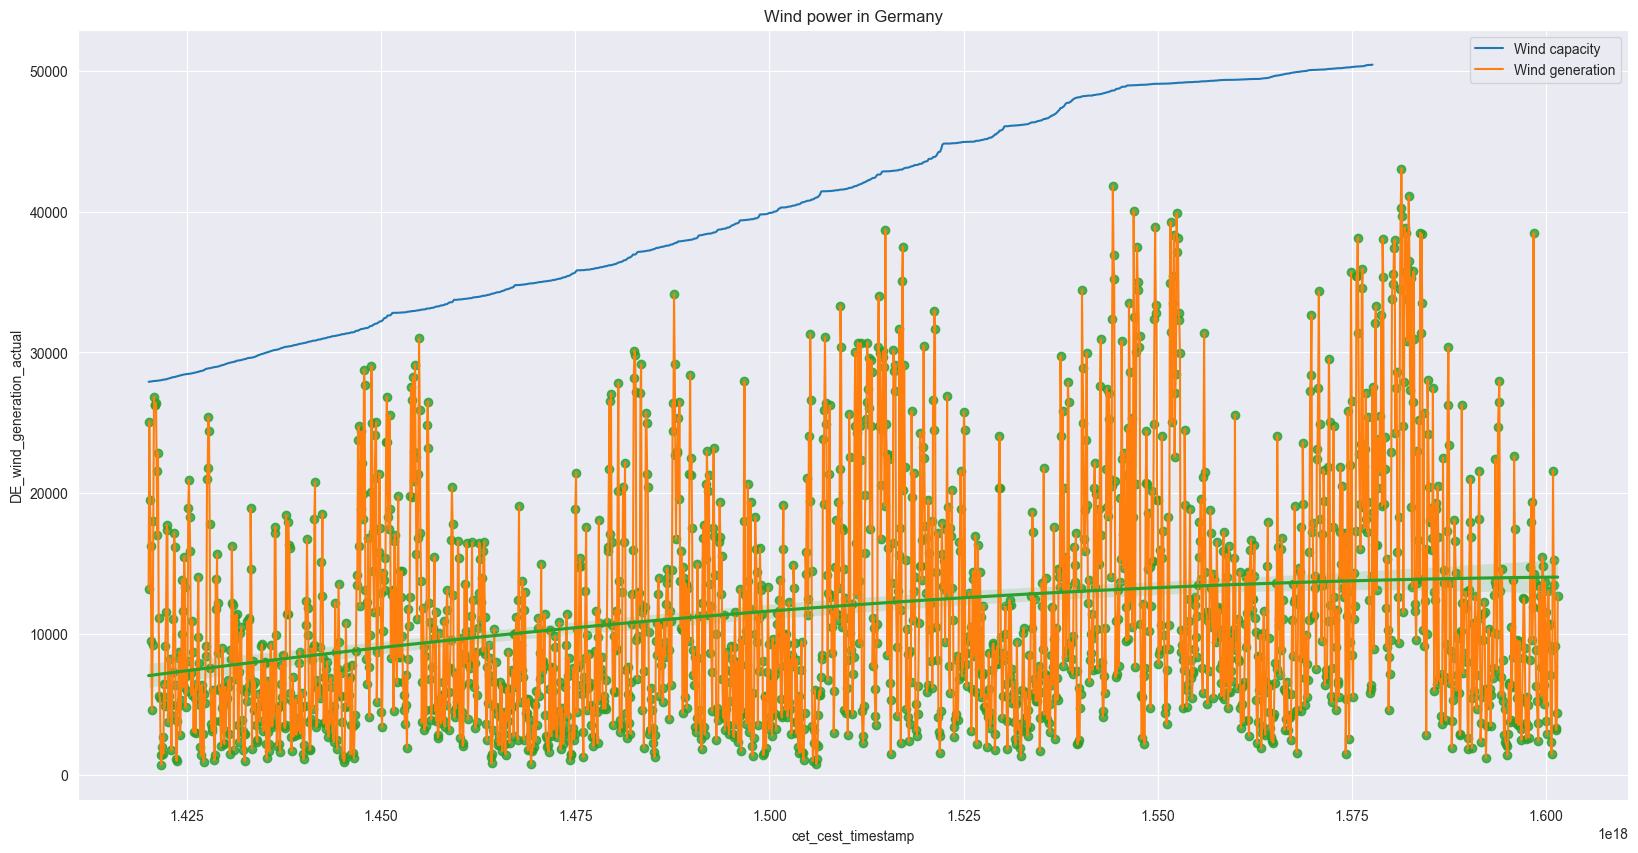

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

power_df["cet_cest_timestamp"] = pd.to_numeric(power_df["cet_cest_timestamp"])

plt.figure(figsize=(20, 10))
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_capacity"], label="Solar capacity")
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_generation_actual"], label="Solar generation")
plt.xlabel("Date")
plt.ylabel("Power [MW]")
plt.title("Solar power in Germany")

#sns regplot
sns.regplot(x="cet_cest_timestamp", y="DE_solar_generation_actual", data=power_df, order=2)

plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_wind_capacity"], label="Wind capacity")
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_wind_generation_actual"], label="Wind generation")
plt.xlabel("Date")
plt.ylabel("Power [MW]")
plt.title("Wind power in Germany")

# sns regplot
sns.regplot(x="cet_cest_timestamp", y="DE_wind_generation_actual", data=power_df, order=2)

plt.legend()
plt.show()

# # Monthly
# # group every month together and calculate the mean
# new_power_df = power_df.groupby(pd.Grouper(key="cet_cest_timestamp", freq="M")).mean().reset_index()
#
# plt.figure(figsize=(20, 10))
# plt.plot(new_power_df["cet_cest_timestamp"], new_power_df["DE_solar_capacity"], label="Solar capacity")
# plt.plot(new_power_df["cet_cest_timestamp"], new_power_df["DE_solar_generation_actual"], label="Solar generation")
# plt.xlabel("Date")
# plt.ylabel("Power [MW]")
# plt.title("Solar power in Germany")
# plt.legend()
# plt.show()
#
# plt.figure(figsize=(20, 10))
# plt.plot(new_power_df["cet_cest_timestamp"], new_power_df["DE_wind_capacity"], label="Wind capacity")
# plt.plot(new_power_df["cet_cest_timestamp"], new_power_df["DE_wind_generation_actual"], label="Wind generation")
# plt.xlabel("Date")
# plt.ylabel("Power [MW]")
# plt.title("Wind power in Germany")
# plt.legend()
# plt.show()

# --> mittelwert monat besser -> mehr smoothness -> dann beide in ein diagramm

# -> 2016 - 2017 minus peak analysieren und am tag mit wind vergleichen

#how to speicher? stausee batterie h2

#peaks von wind krasser als solar -> kurzfristig speichern, solar etwas besser abschätzbar, speicherung über nacht aber nicht 3 monate zb

Local min:  2016-06-01
Solar gen:  0.0
Wind gen:  7972.0


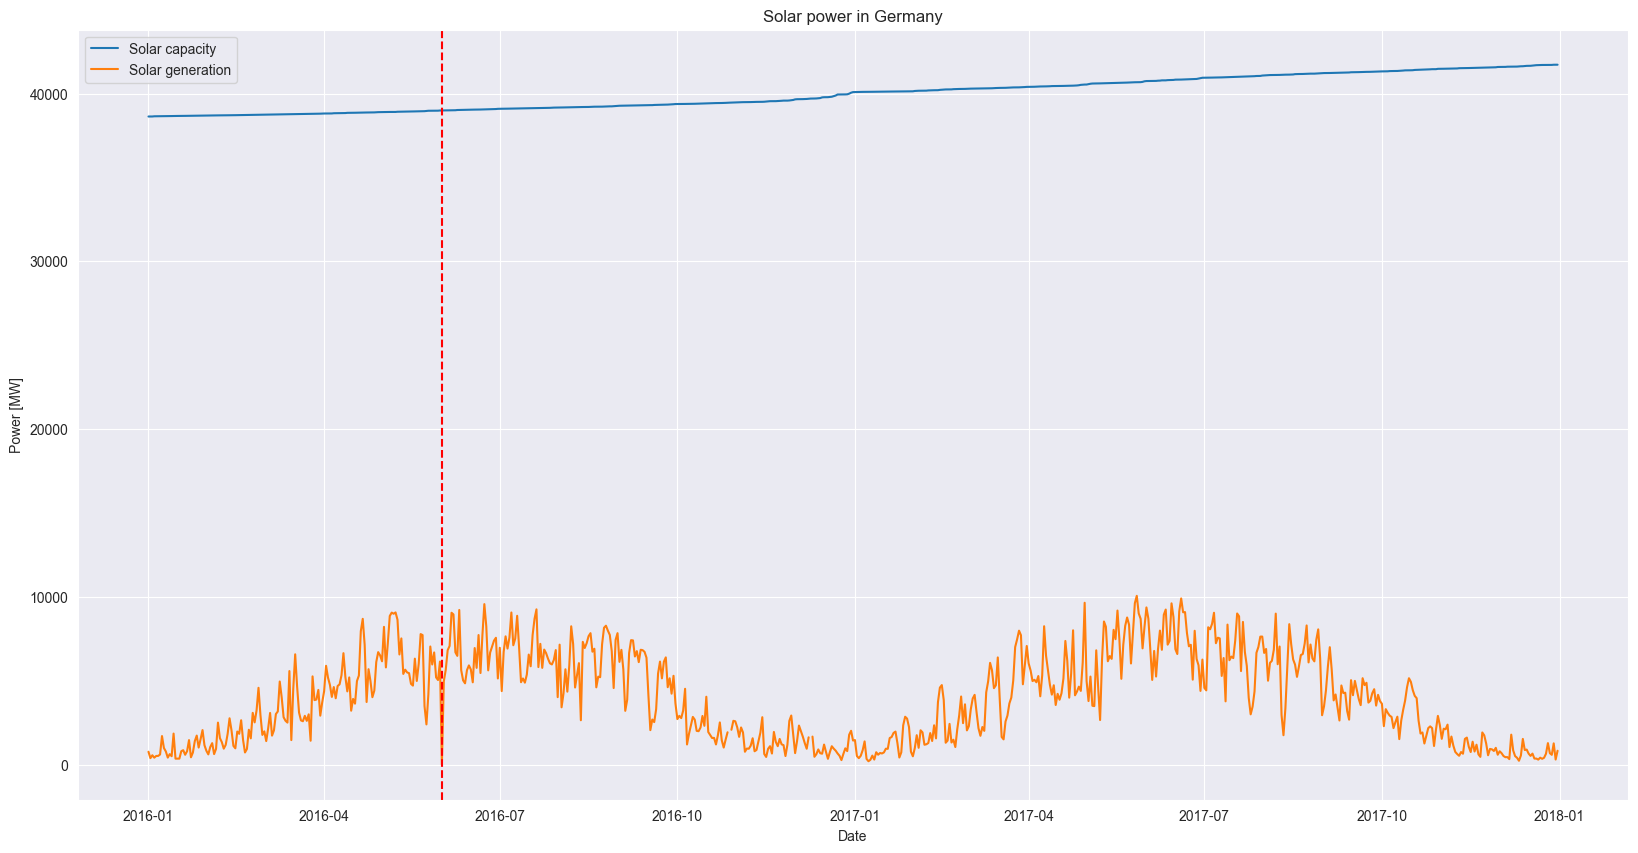

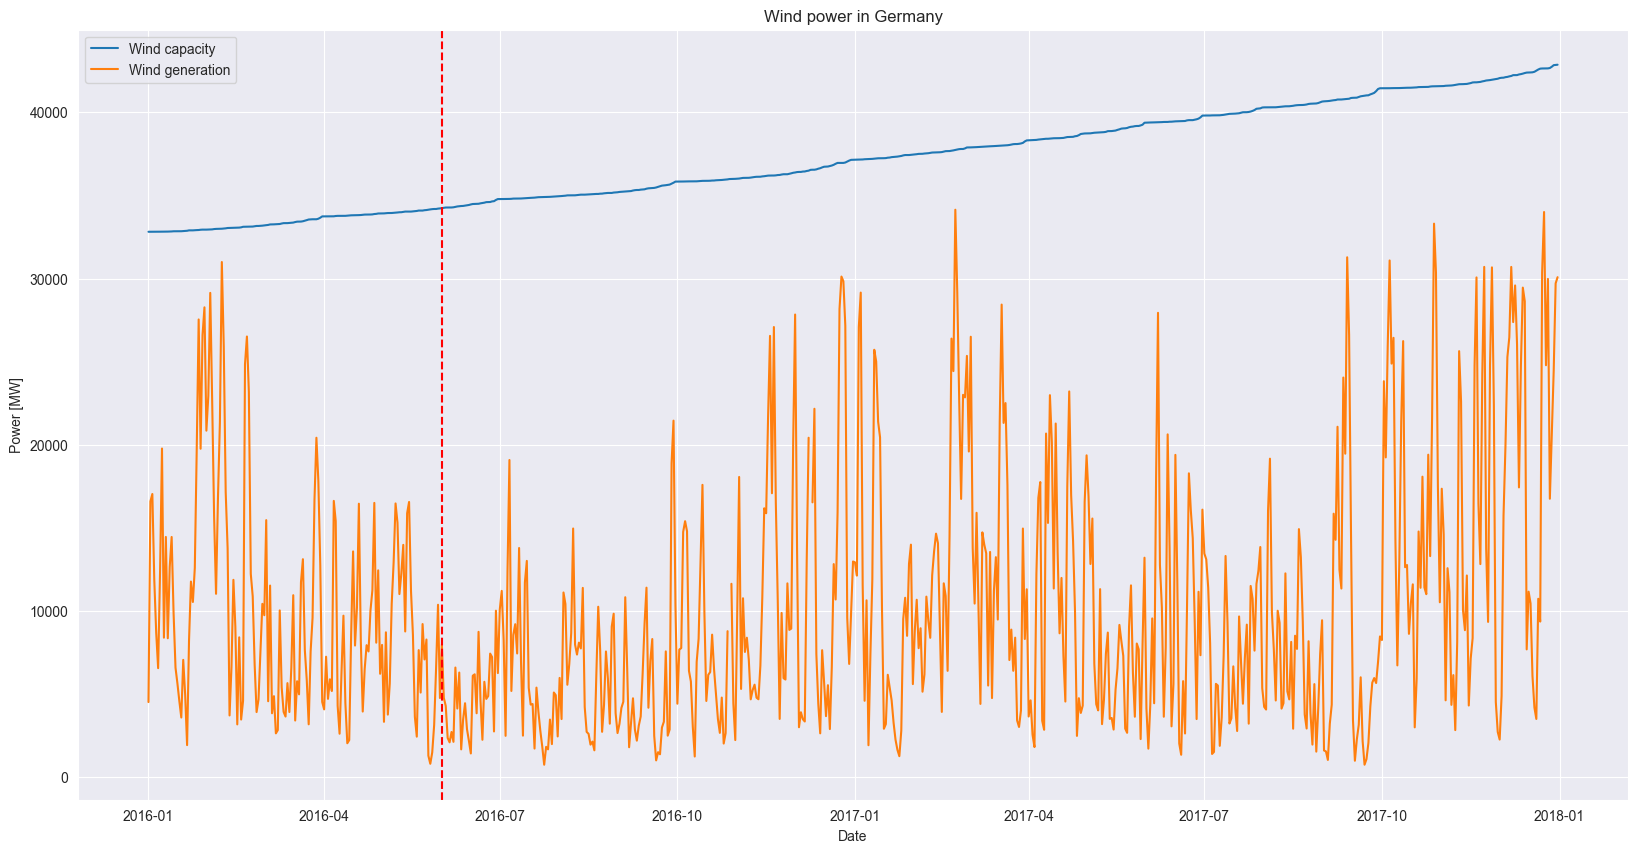

Cloud cover:  3.171152518978606
Rain:  0.08136363636363632


In [7]:
import pandas as pd

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

# keep only 2016 to 2017
power_df = power_df[(power_df["cet_cest_timestamp"] >= pd.Timestamp(2016, 1, 1).date()) & (power_df["cet_cest_timestamp"] <= pd.Timestamp(2017, 12, 31).date())]

# get the date with the lowest value between 2016-04 and 2016-07
min_date = power_df[(power_df["cet_cest_timestamp"] >= pd.Timestamp(2016, 4, 1).date()) & (power_df["cet_cest_timestamp"] <= pd.Timestamp(2016, 7, 1).date())]["DE_solar_generation_actual"].idxmin()

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_capacity"], label="Solar capacity")
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_generation_actual"], label="Solar generation")
plt.xlabel("Date")
plt.ylabel("Power [MW]")
plt.title("Solar power in Germany")
plt.legend()

# mark the date with the lowest value
plt.axvline(x=power_df["cet_cest_timestamp"][min_date], color="red", linestyle="--")

# print the date with the lowest value
print("Local min: ", power_df["cet_cest_timestamp"][min_date])
# print the value of the local min
print("Solar gen: ", power_df["DE_solar_generation_actual"][min_date])
print("Wind gen: ", power_df["DE_wind_generation_actual"][min_date])


plt.show()

plt.figure(figsize=(20, 10))
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_wind_capacity"], label="Wind capacity")
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_wind_generation_actual"], label="Wind generation")
plt.xlabel("Date")
plt.ylabel("Power [MW]")
plt.title("Wind power in Germany")
plt.legend()

# mark the date with the lowest value
plt.axvline(x=power_df["cet_cest_timestamp"][min_date], color="red", linestyle="--")

plt.show()

# Cloud data

import pandas as pd

cloud_df = pd.read_sql_table("cloud_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
cloud_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
cloud_df["date"] = cloud_df["date"].dt.date

# Group by date and calculate the average of the cloud cover
cloud_df = cloud_df.groupby("date")[["cloud_cover"]].mean().reset_index()

# print the value of the local min
print("Cloud cover: ", cloud_df["cloud_cover"][min_date])

# Rain

rain_df = pd.read_sql_table("rain_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
rain_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
rain_df["date"] = rain_df["date"].dt.date

# Remove bad data
drop_codes = {
    4: pd.NA,  # Form of precipitation not known, although precipitation reported
    9: pd.NA,  # Misidentification; missing value or precipitation form not detectable with automatic measurement
}
rain_df["rain_form"] = rain_df["rain_form"].replace(drop_codes)

# Aggregate data
def mode_without_zero(x):
    x = x[x != 0]
    return x.mode() if not x.empty else pd.NA

aggregations = {
    "rain": "mean",
    "rain_form": mode_without_zero,
    "snow_height": "mean",
    "new_snow_height": "mean",
}

# Group by date and calculate the average precipitation
rain_df = rain_df.groupby("date").agg(aggregations).reset_index()

# print the value of the local min
print("Rain: ", rain_df["rain"][min_date])

#
# maybe error in data, because auf 0.0
# cant find any extreme weather phenomena researching this date
#


Solar generation on 2020-02-09:  3328.6666666666665
Wind generation on 2020-02-09:  34538.041666666664


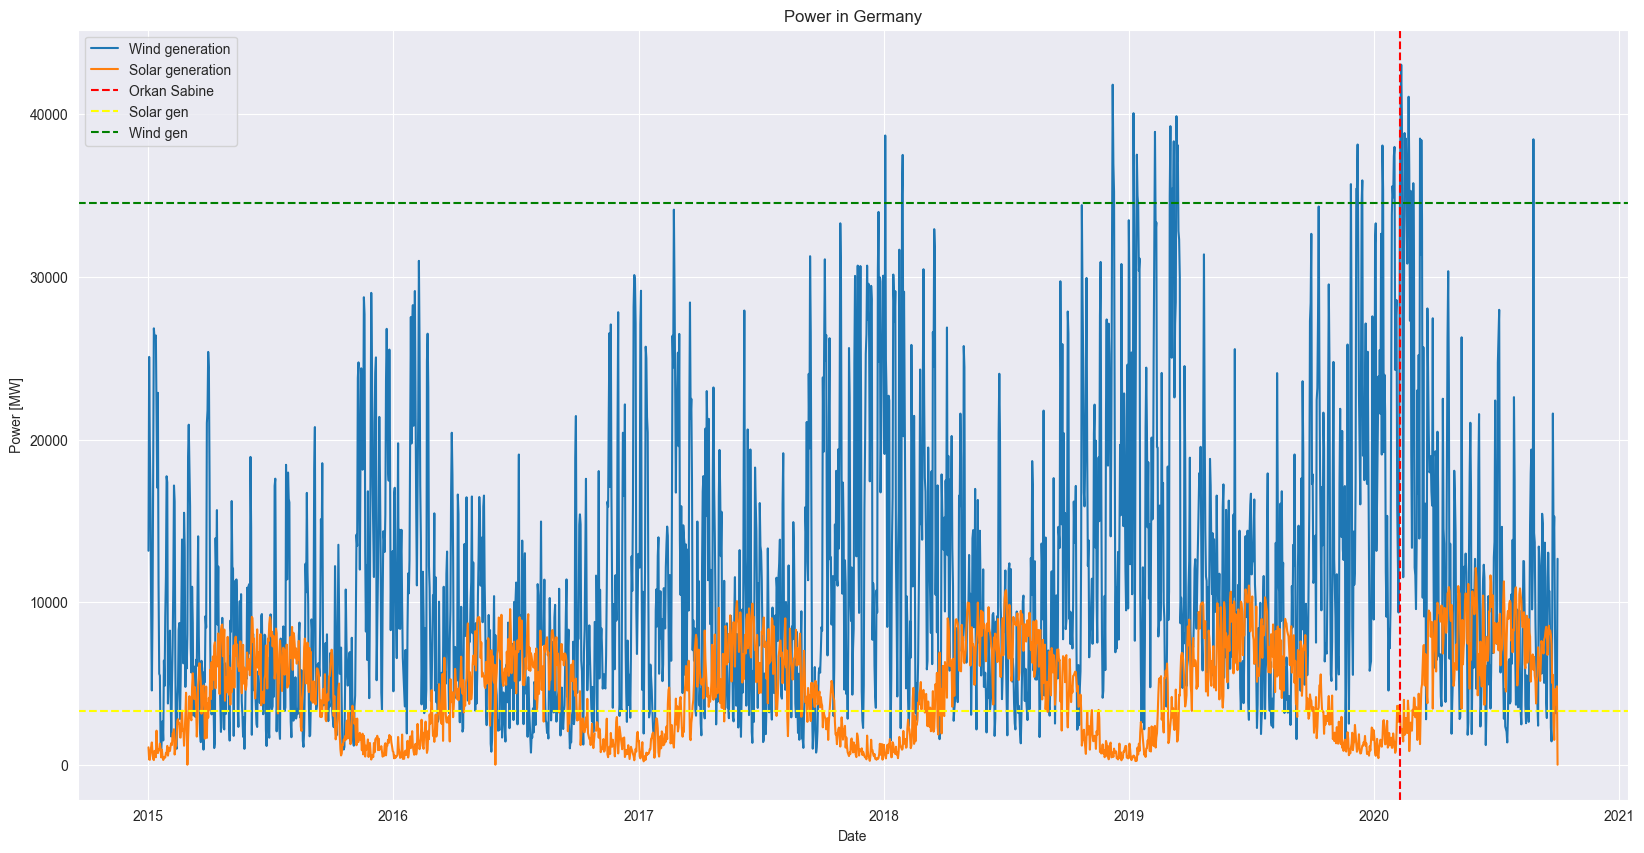

In [14]:
# Orkan sabine
import pandas as pd
orkan_sabine_date = pd.Timestamp(2020, 2, 9).date()

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

# get the index of the date of orkan_sabine
asdf = power_df[power_df["cet_cest_timestamp"] == orkan_sabine_date].index[0]

# print the value of the local min
print(f"Solar generation on {orkan_sabine_date}: ", power_df["DE_solar_generation_actual"][asdf])
print(f"Wind generation on {orkan_sabine_date}: ", power_df["DE_wind_generation_actual"][asdf])


# Graph visuatltions

plt.figure(figsize=(20, 10))
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_wind_generation_actual"], label="Wind generation")
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_generation_actual"], label="Solar generation")
plt.xlabel("Date")
plt.ylabel("Power [MW]")
plt.title("Power in Germany")

# add line for orkan sabine date
plt.axvline(x=power_df["cet_cest_timestamp"][asdf], color="red", linestyle="--", label="Orkan Sabine")

# add line for solar gen on orkan sabine date
plt.axhline(y=power_df["DE_solar_generation_actual"][asdf], color="yellow", linestyle="--", label="Solar gen")

# add line for wind gen on orkan sabine date
plt.axhline(y=power_df["DE_wind_generation_actual"][asdf], color="green", linestyle="--", label="Wind gen")

plt.legend()
plt.show()


# Not the lowest solar production in the year,
# very high wind production

# -> Orkan Sabine had little impact on grid stability


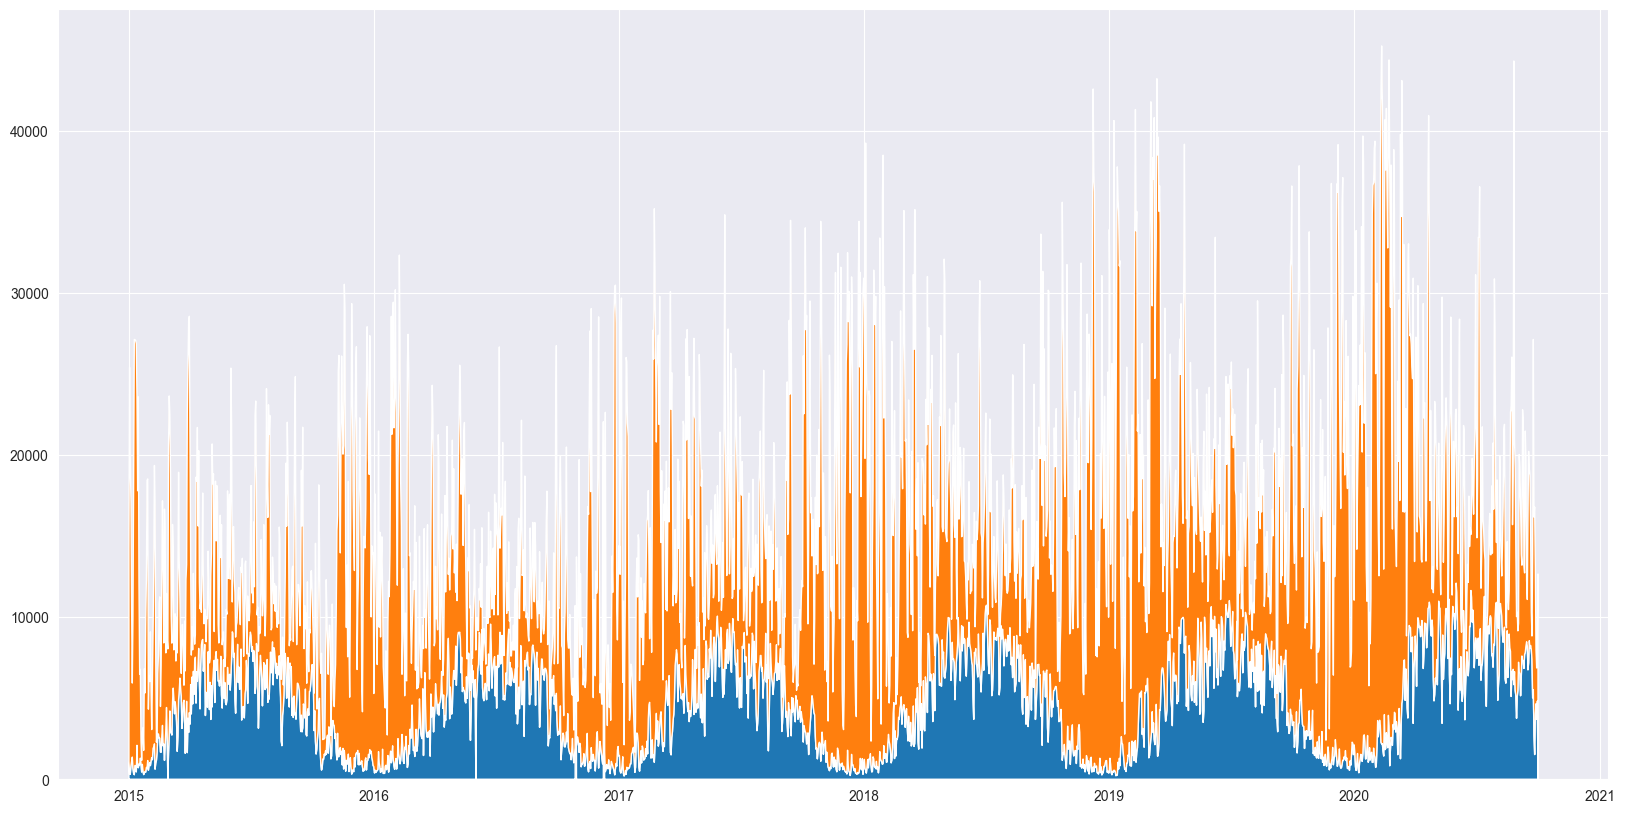

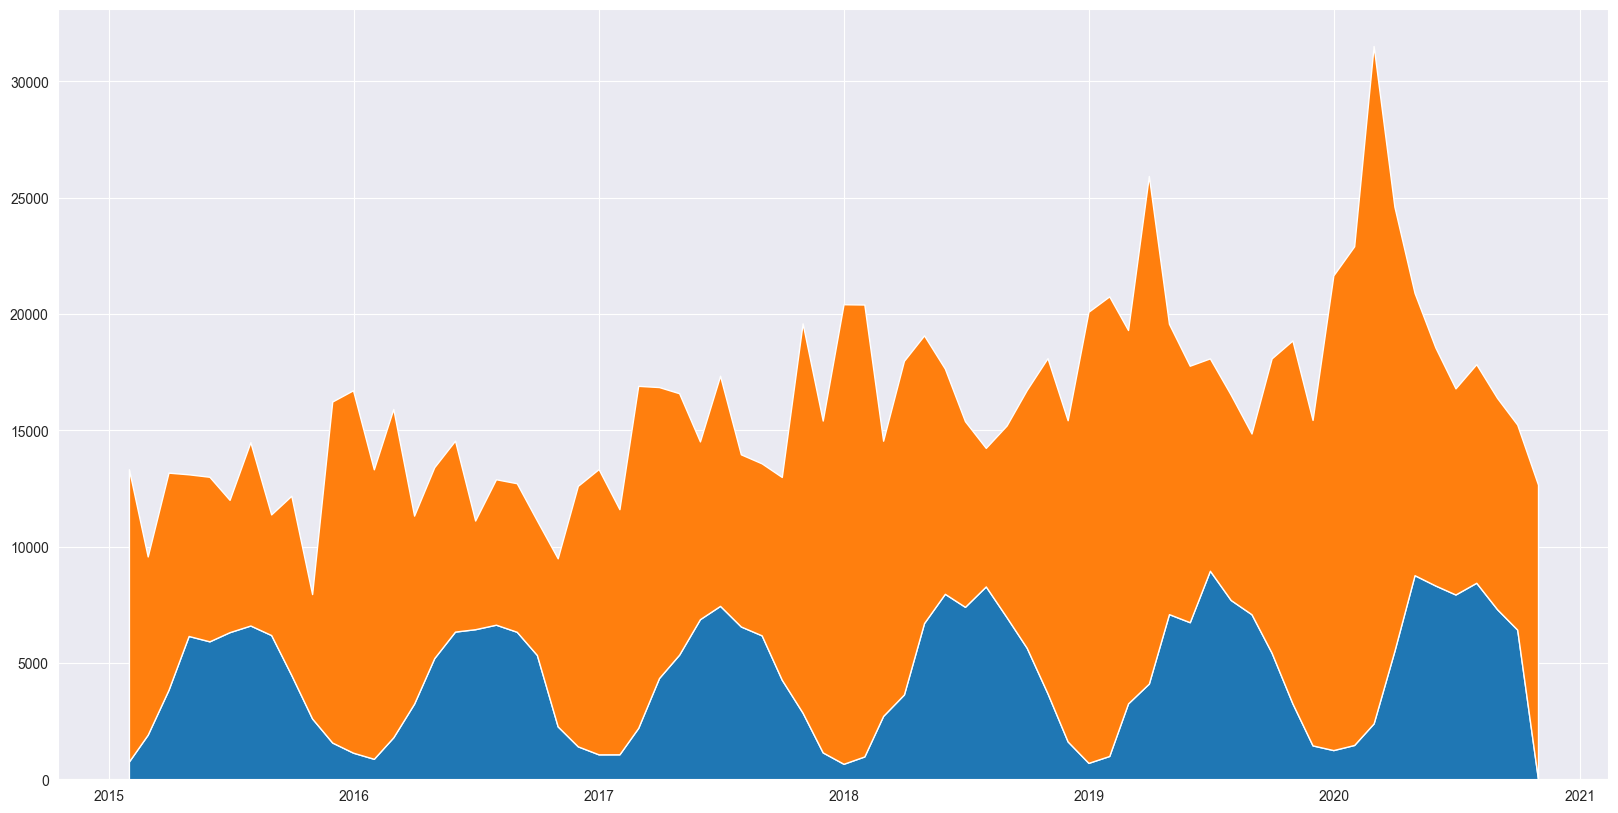

In [25]:
import pandas as pd

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

# Plot a stacked area chart with solar and wind power
plt.figure(figsize=(20, 10))
plt.stackplot(
    power_df["cet_cest_timestamp"],
    power_df["DE_solar_generation_actual"],
    power_df["DE_wind_generation_actual"],
    labels=["Solar generation", "Wind generation"],
)

# avg per month

# Convert the "cet_cest_timestamp" column to datetime if it's not already
power_df["cet_cest_timestamp"] = pd.to_datetime(power_df["cet_cest_timestamp"])

# Set "cet_cest_timestamp" as the index
power_df.set_index("cet_cest_timestamp", inplace=True)

# Group by month and calculate the mean
power_df = power_df.groupby(pd.Grouper(freq="M")).mean().reset_index()

# Plot a stacked area chart with solar and wind power
plt.figure(figsize=(20, 10))
plt.stackplot(
    power_df["cet_cest_timestamp"],
    power_df["DE_solar_generation_actual"],
    power_df["DE_wind_generation_actual"],
    labels=["Solar generation", "Wind generation"],
)

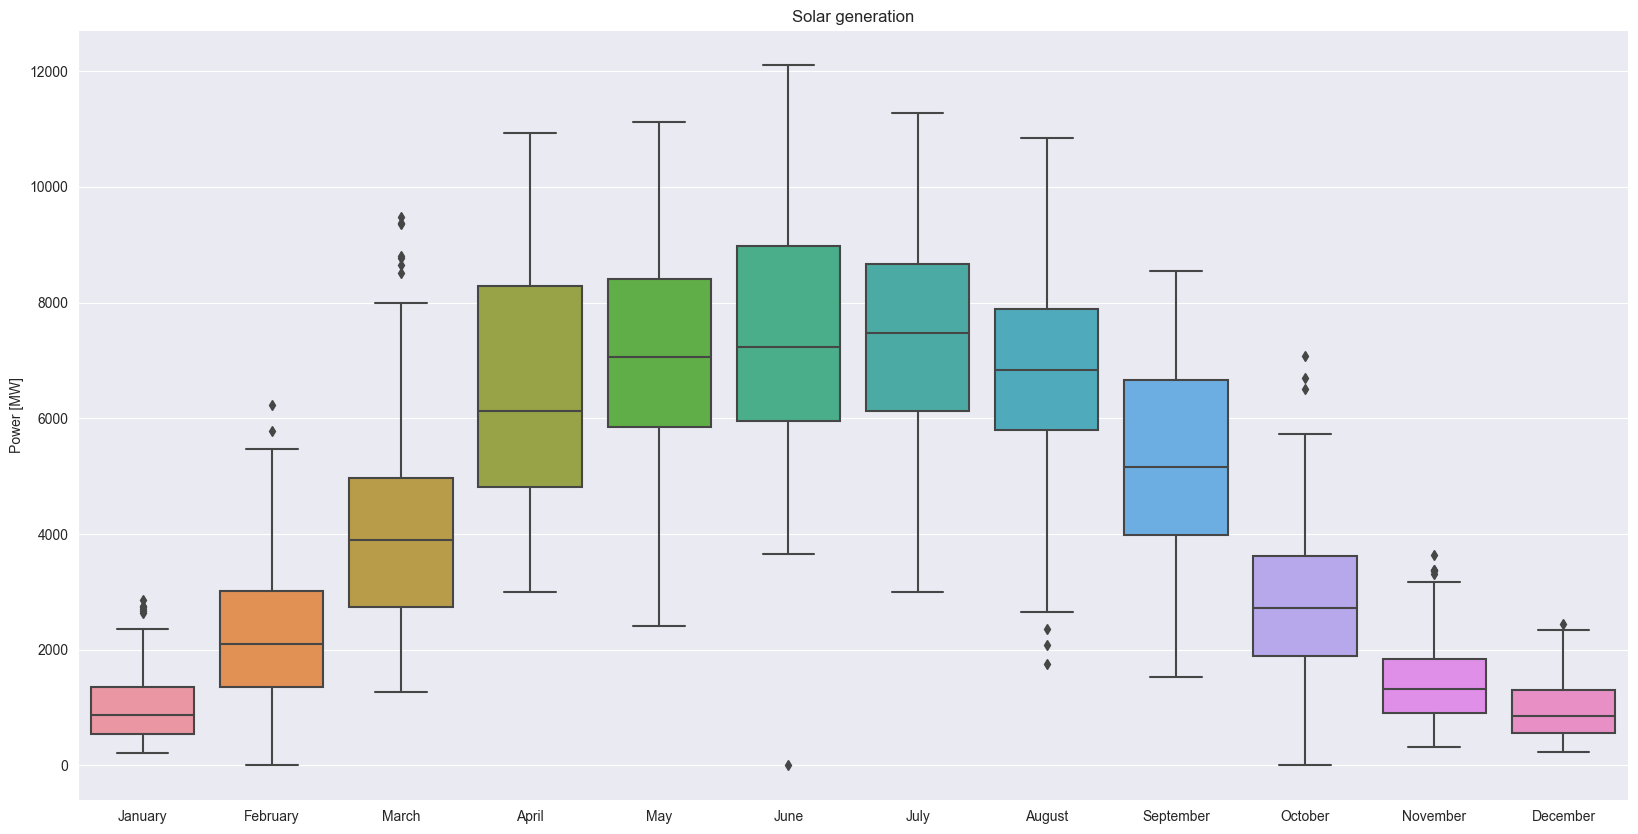

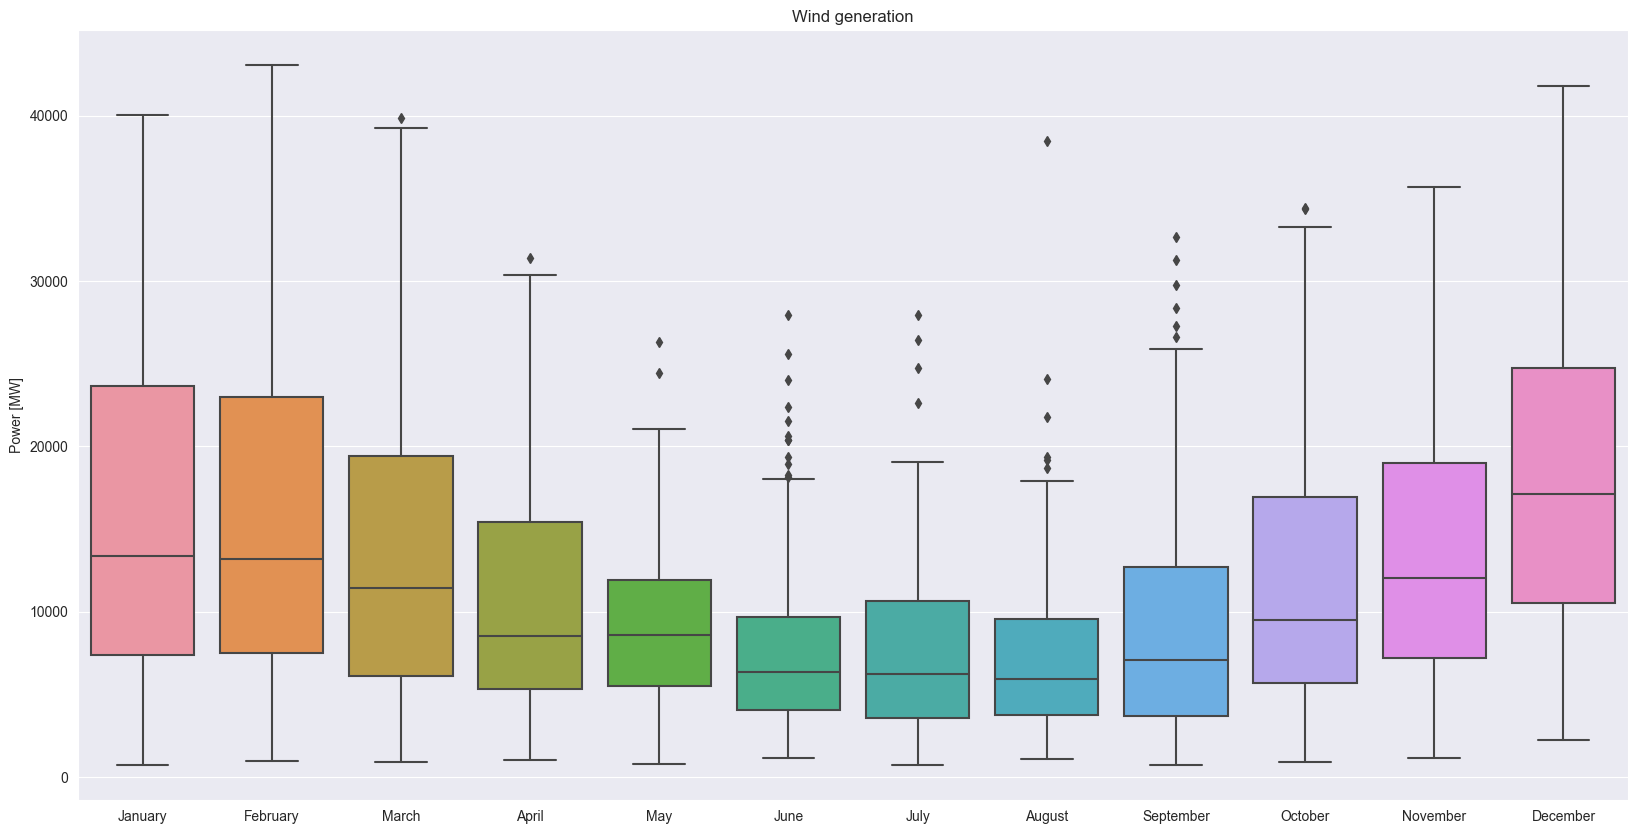

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

# Create a boxplot for solar and wind generation using seaborn
# plt.figure(figsize=(20, 10))
# sns.boxplot(data=power_df[["DE_solar_generation_actual", "DE_wind_generation_actual"]])

# create 12 boxplots (one for every month) and use the values for every year

# convert the "cet_cest_timestamp" column to datetime if it's not already
power_df["cet_cest_timestamp"] = pd.to_datetime(power_df["cet_cest_timestamp"])

january = power_df[power_df["cet_cest_timestamp"].dt.month == 1]
february = power_df[power_df["cet_cest_timestamp"].dt.month == 2]
march = power_df[power_df["cet_cest_timestamp"].dt.month == 3]
april = power_df[power_df["cet_cest_timestamp"].dt.month == 4]
may = power_df[power_df["cet_cest_timestamp"].dt.month == 5]
june = power_df[power_df["cet_cest_timestamp"].dt.month == 6]
july = power_df[power_df["cet_cest_timestamp"].dt.month == 7]
august = power_df[power_df["cet_cest_timestamp"].dt.month == 8]
september = power_df[power_df["cet_cest_timestamp"].dt.month == 9]
october = power_df[power_df["cet_cest_timestamp"].dt.month == 10]
november = power_df[power_df["cet_cest_timestamp"].dt.month == 11]
december = power_df[power_df["cet_cest_timestamp"].dt.month == 12]

plt.figure(figsize=(20, 10))
the_plot = sns.boxplot(data=[january["DE_solar_generation_actual"], february["DE_solar_generation_actual"], march["DE_solar_generation_actual"], april["DE_solar_generation_actual"], may["DE_solar_generation_actual"], june["DE_solar_generation_actual"], july["DE_solar_generation_actual"], august["DE_solar_generation_actual"], september["DE_solar_generation_actual"], october["DE_solar_generation_actual"], november["DE_solar_generation_actual"], december["DE_solar_generation_actual"]])
the_plot.set_xticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"])
plt.title("Solar generation")
plt.ylabel("Power [MW]")
plt.show()

plt.figure(figsize=(20, 10))
the_plot = sns.boxplot(data=[january["DE_wind_generation_actual"], february["DE_wind_generation_actual"], march["DE_wind_generation_actual"], april["DE_wind_generation_actual"], may["DE_wind_generation_actual"], june["DE_wind_generation_actual"], july["DE_wind_generation_actual"], august["DE_wind_generation_actual"], september["DE_wind_generation_actual"], october["DE_wind_generation_actual"], november["DE_wind_generation_actual"], december["DE_wind_generation_actual"]])
the_plot.set_xticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"])
plt.title("Wind generation")
plt.ylabel("Power [MW]")
plt.show()

### Cloud data
This visualization is all over the place. We can't see any clear trend or patterns apart from a wave effect that is
probably due to the seasons or other global weather patterns.

In [55]:
import pandas as pd

cloud_df = pd.read_sql_table("cloud_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
cloud_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
cloud_df["date"] = cloud_df["date"].dt.date

# Group by date and calculate the average of the cloud cover
cloud_df = cloud_df.groupby("date")[["cloud_cover"]].mean().reset_index()

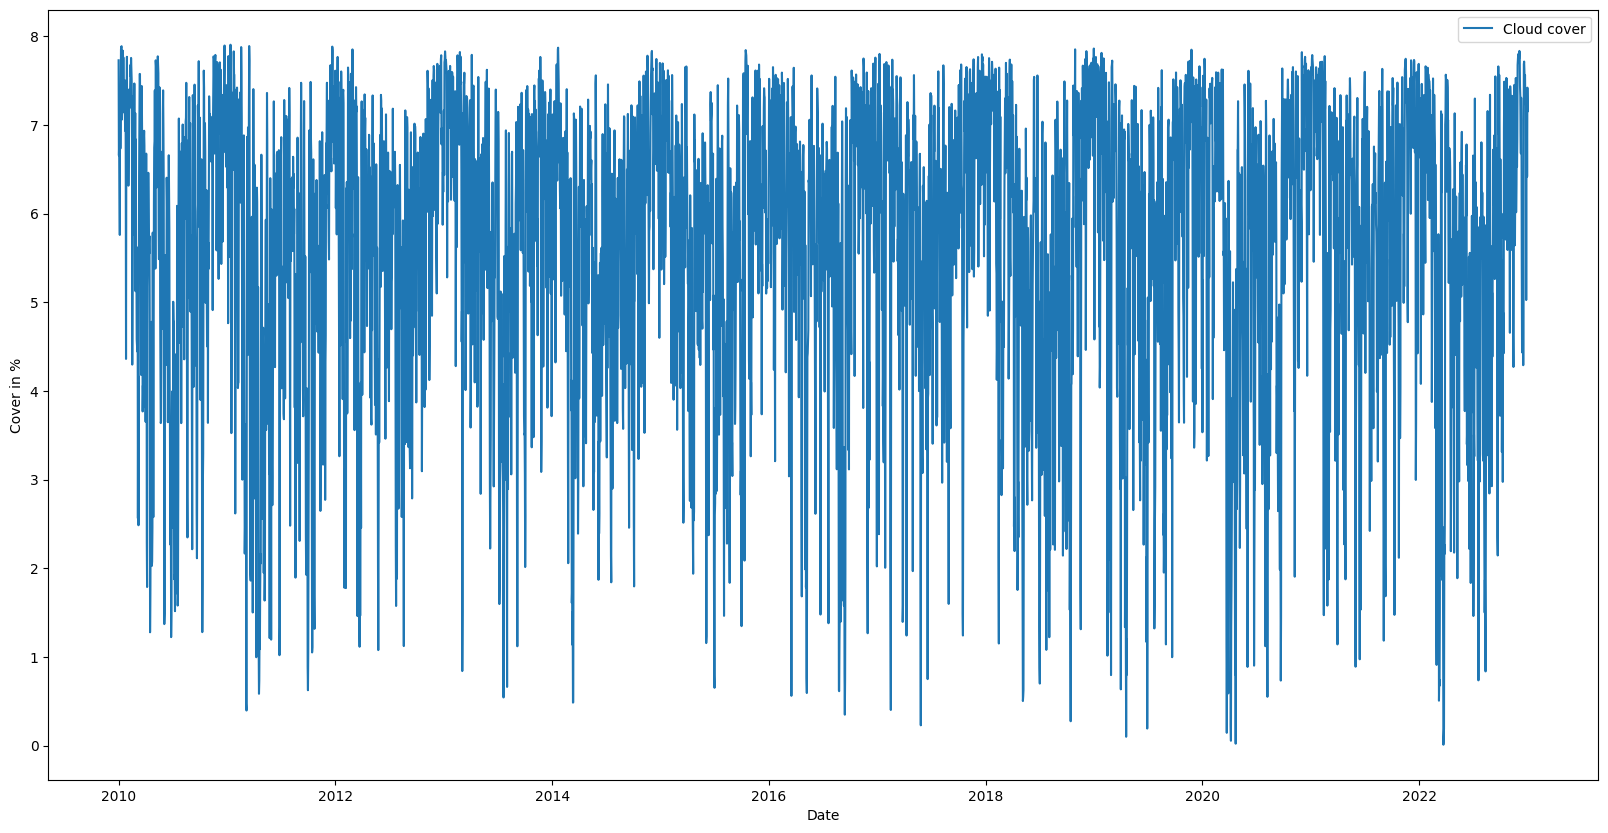

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(cloud_df["date"], cloud_df["cloud_cover"], label="Cloud cover")
plt.xlabel("Date")
plt.ylabel("Cover in %")
plt.legend()
plt.show()

### Rain data
This visualization is also all over the place. We need to zoom in on a particular time period such as 2019 to hopefully see some patterns.

In [57]:
rain_df = pd.read_sql_table("rain_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
rain_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
rain_df["date"] = rain_df["date"].dt.date

# Remove bad data
drop_codes = {
    4: pd.NA,  # Form of precipitation not known, although precipitation reported
    9: pd.NA,  # Misidentification; missing value or precipitation form not detectable with automatic measurement
}
rain_df["rain_form"] = rain_df["rain_form"].replace(drop_codes)

# Aggregate data
def mode_without_zero(x):
    x = x[x != 0]
    return x.mode() if not x.empty else pd.NA

aggregations = {
    "rain": "mean",
    "rain_form": mode_without_zero,
    "snow_height": "mean",
    "new_snow_height": "mean",
}

# Group by date and calculate the average precipitation
rain_df = rain_df.groupby("date").agg(aggregations).reset_index()

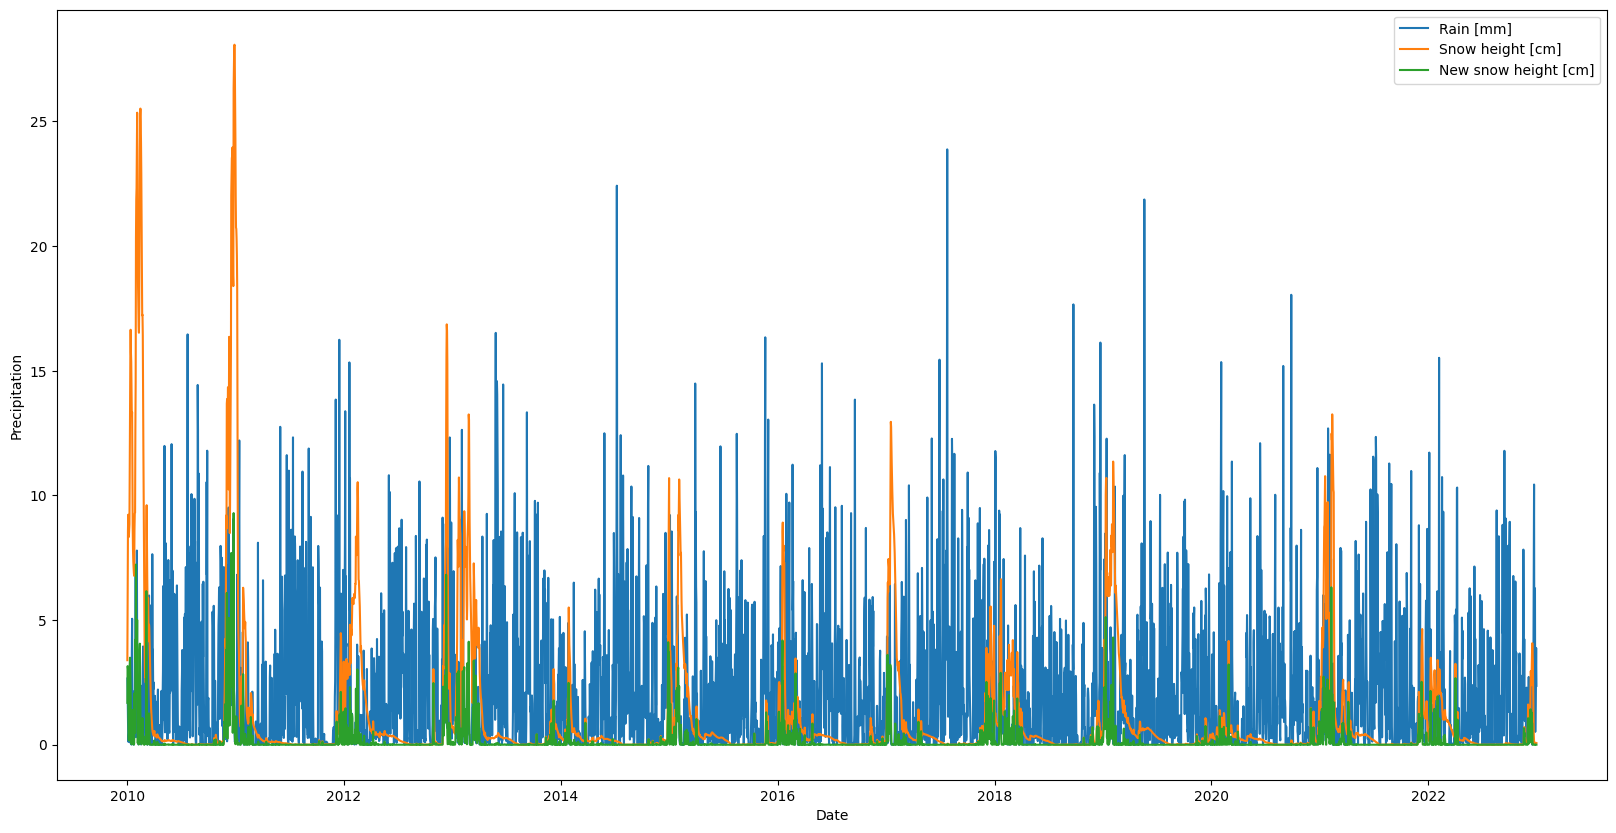

In [58]:
plt.figure(figsize=(20, 10))
plt.plot(rain_df["date"], rain_df["rain"], label="Rain [mm]")
plt.plot(rain_df["date"], rain_df["snow_height"], label="Snow height [cm]")
plt.plot(rain_df["date"], rain_df["new_snow_height"], label="New snow height [cm]")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend()
plt.show()

### Temperature data
Temperature changes with the seasons. Humidity is also changing, but it is not as clear as with temperature. It seems to be inversely proportional to temperature.

In [59]:
temperature_df = pd.read_sql_table("temperature_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
temperature_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
temperature_df["date"] = temperature_df["date"].dt.date

# Group by date and calculate the average temperature in Germany
temperature_df = temperature_df.groupby("date")[["temperature", "humidity"]].mean().reset_index()

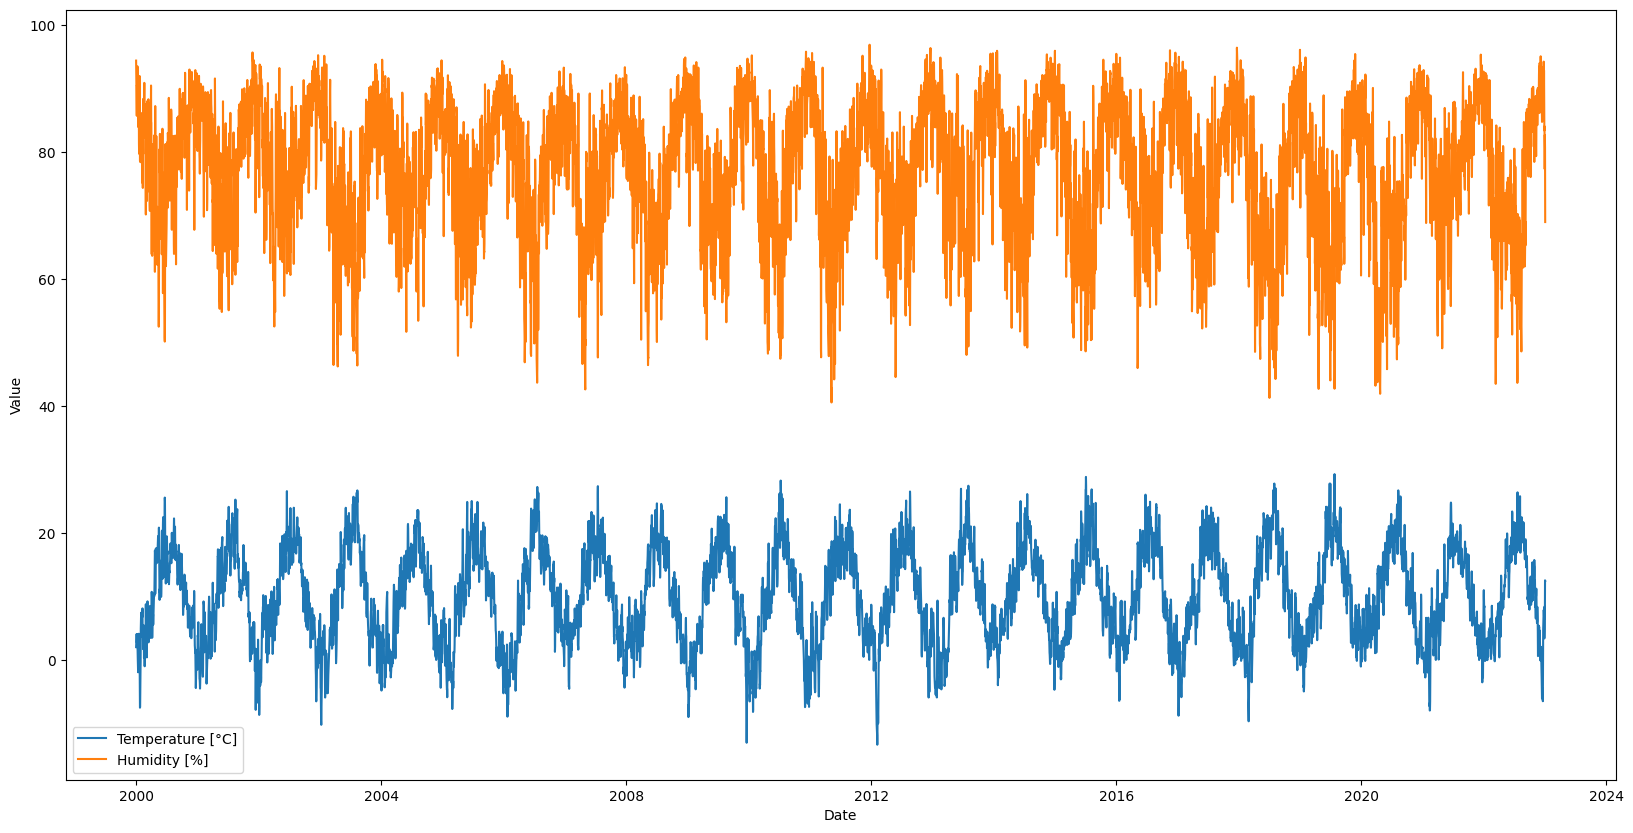

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(temperature_df["date"], temperature_df["temperature"], label="Temperature [°C]")
plt.plot(temperature_df["date"], temperature_df["humidity"], label="Humidity [%]")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

### Wind data
No patterns visible apart from a wave effect that is probably due to the seasons or other global weather patterns.
We will have to zoom in on a particular time period such as 2019 to hopefully correlate it with the power generation.

In [61]:
wind_df = pd.read_sql_table("wind_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
wind_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
wind_df["date"] = wind_df["date"].dt.date

# Group by date and calculate the average wind speed in Germany
wind_df = wind_df.groupby("date")[["speed"]].mean().reset_index()

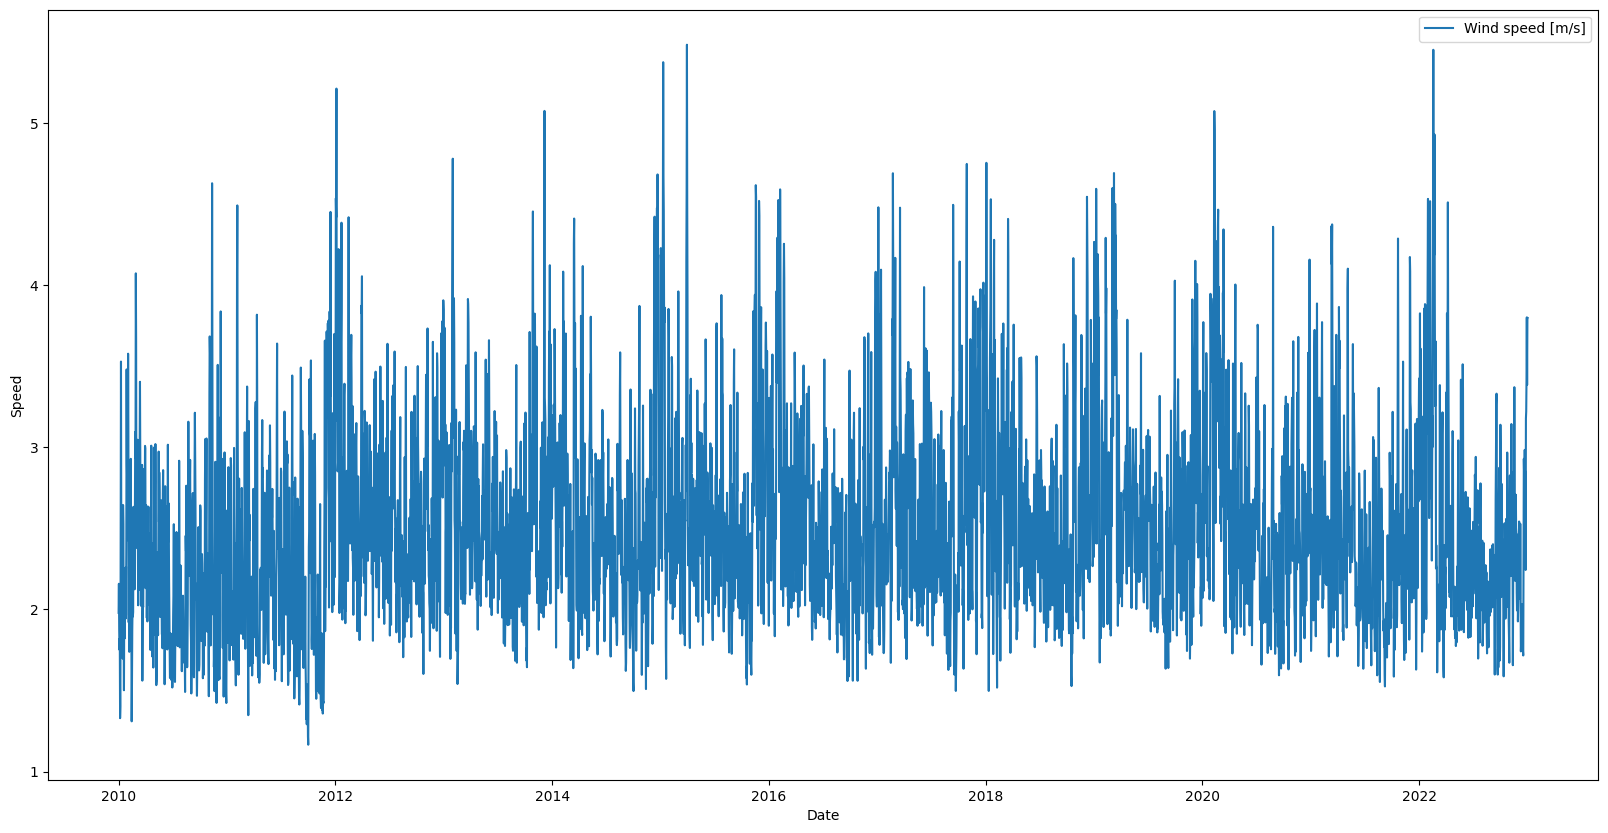

In [62]:
plt.figure(figsize=(20, 10))
plt.plot(wind_df["date"], wind_df["speed"], label="Wind speed [m/s]")
plt.xlabel("Date")
plt.ylabel("Speed")
plt.legend()
plt.show()

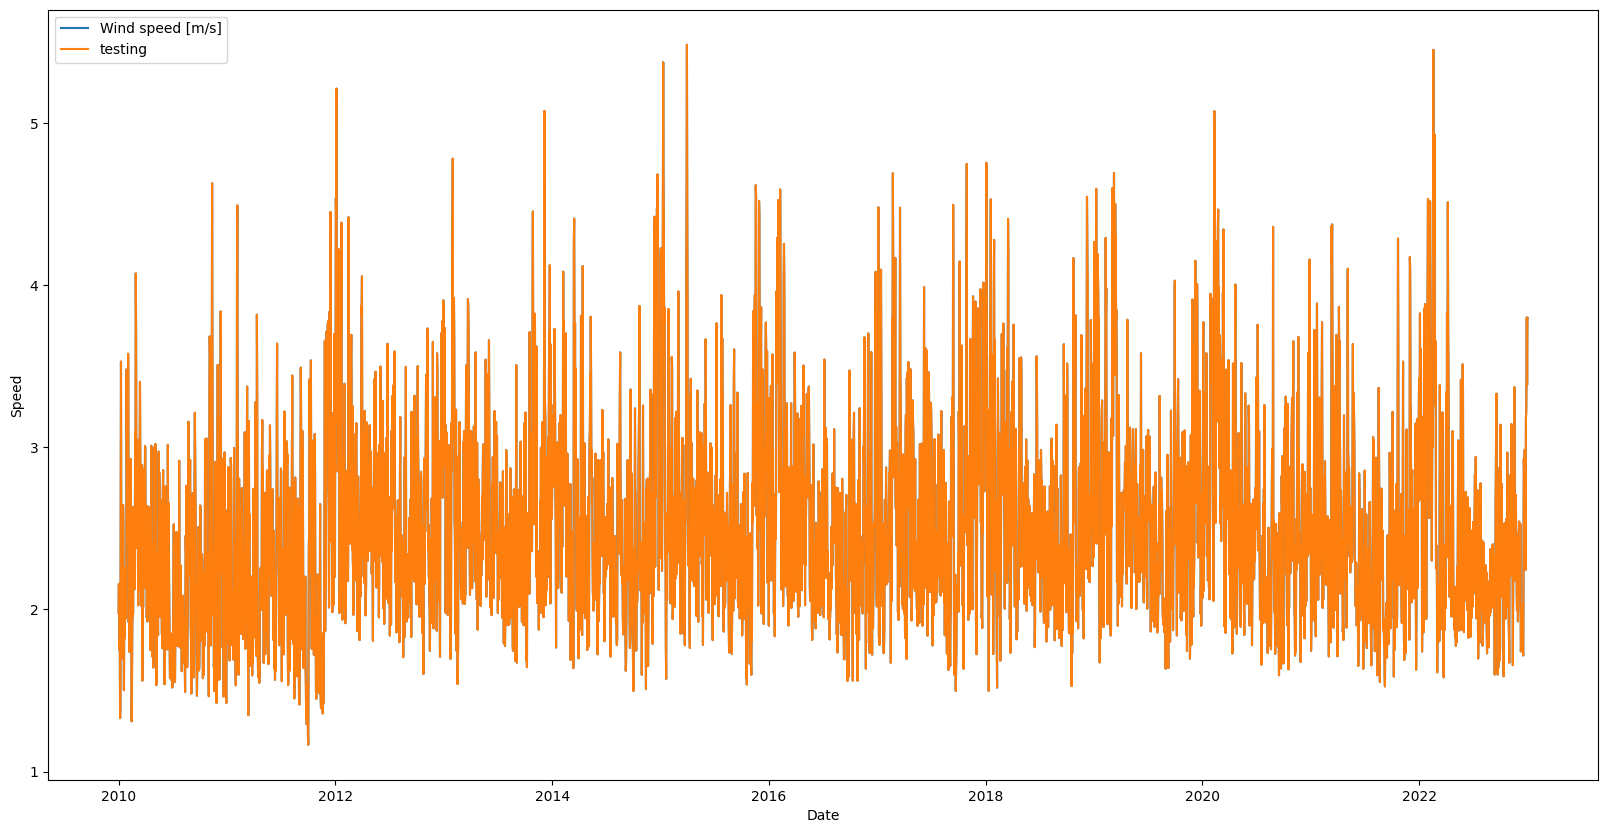

In [63]:
import datetime
import numpy as np
from localreg import localreg, rbf

date_list = wind_df["date"].values

timestamps = np.array([datetime.datetime.combine(date, datetime.datetime.min.time()).timestamp() for date in date_list])

testing = localreg(timestamps, wind_df["speed"].astype(np.float64), degree=25, kernel=rbf.epanechnikov, radius=5)

plt.figure(figsize=(20, 10))
plt.plot(wind_df["date"], wind_df["speed"], label="Wind speed [m/s]")
plt.plot(wind_df["date"], testing, label="testing")
plt.xlabel("Date")
plt.ylabel("Speed")
plt.legend()
plt.show()

## Micro data exploration

### Power data

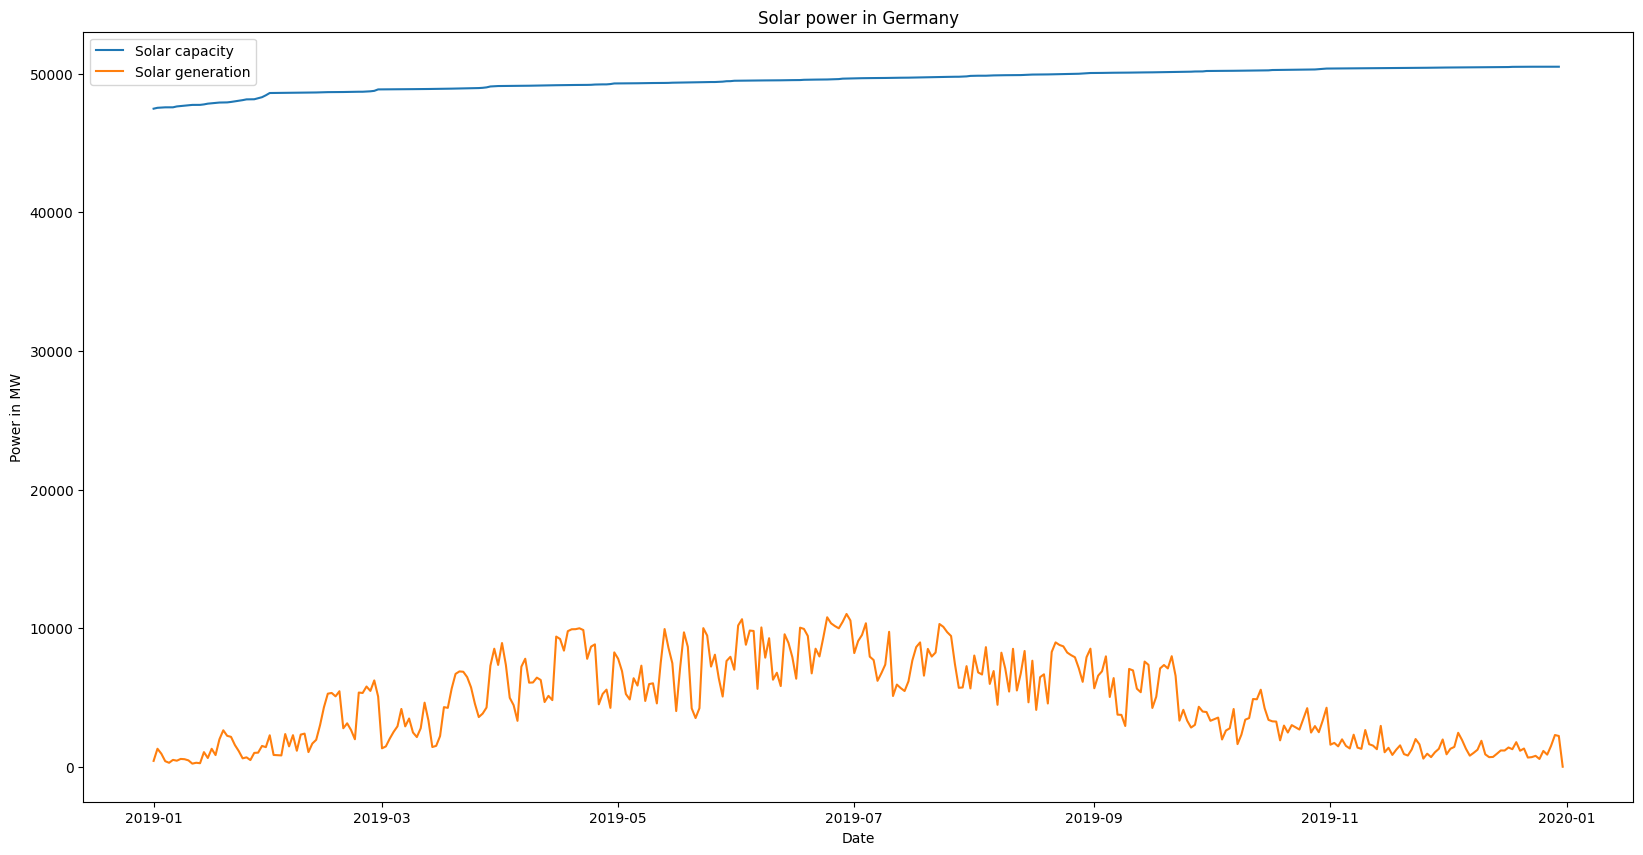

In [2]:
import pandas as pd

start_date: str = "2019-01-01"
end_date: str = "2019-12-31"

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Filter data by start and end date
power_df = power_df[(power_df["cet_cest_timestamp"] >= start_date) & (power_df["cet_cest_timestamp"] <= end_date)]

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_capacity"], label="Solar capacity")
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_generation_actual"], label="Solar generation")
plt.xlabel("Date")
plt.ylabel("Power in MW")
plt.title("Solar power in Germany")
plt.legend()
plt.show()

### Cloud data

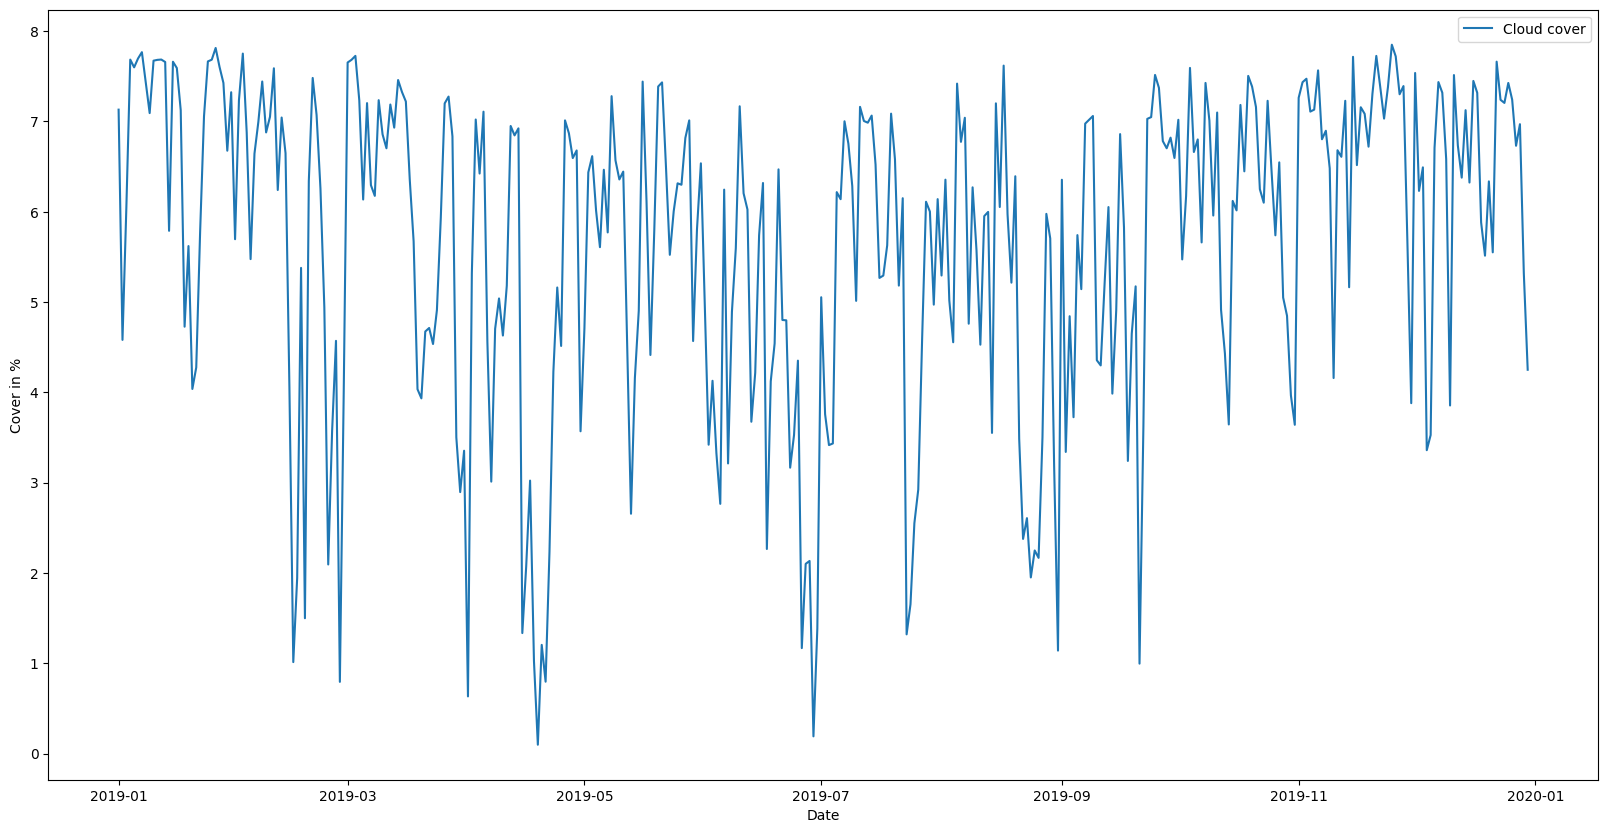

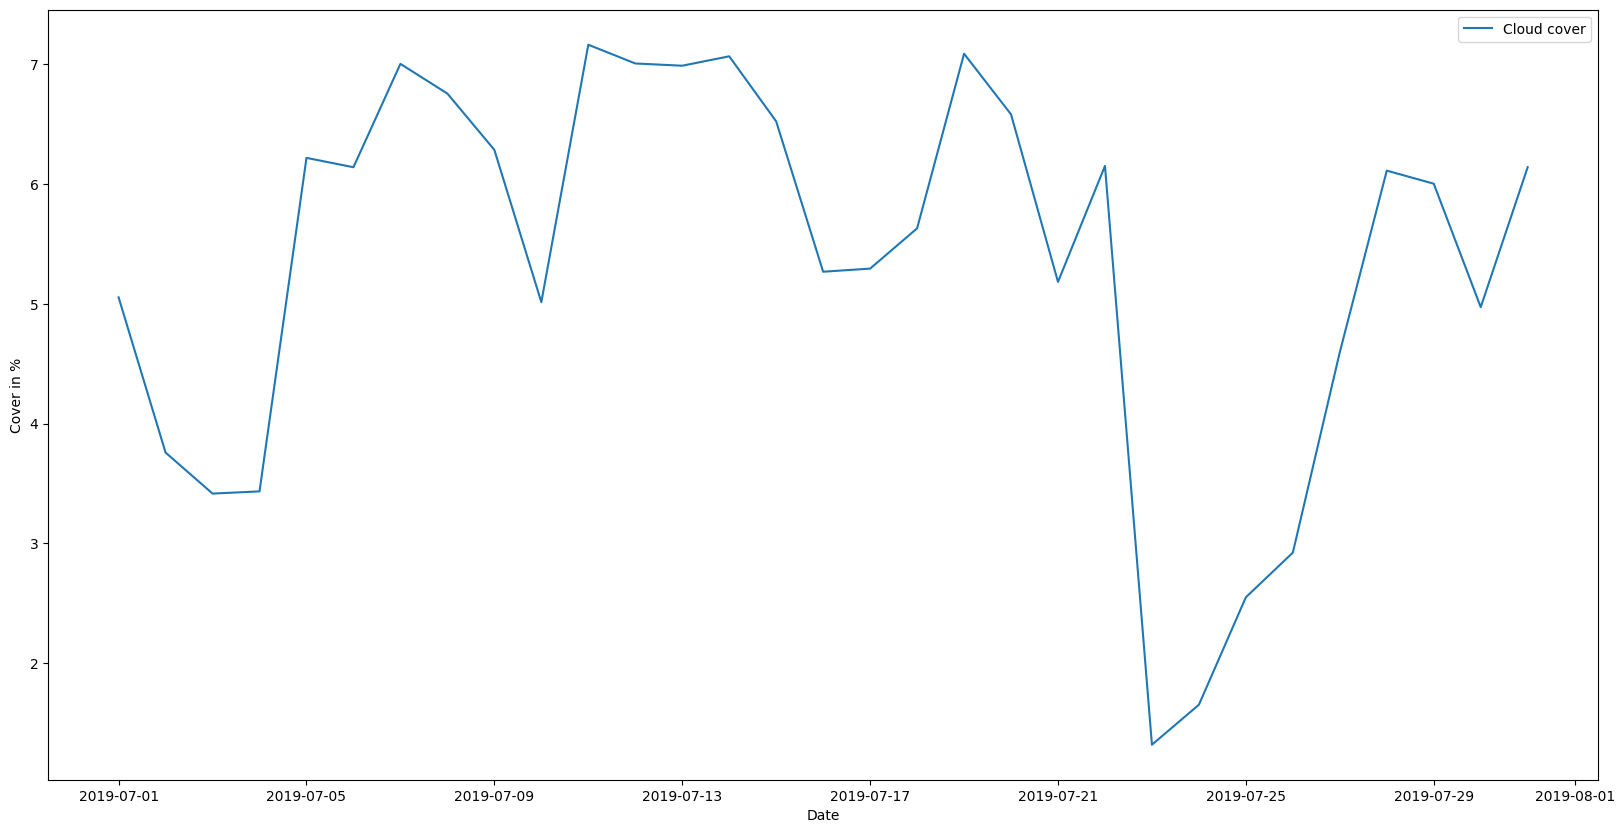

In [10]:
import pandas as pd

cloud_df = pd.read_sql_table("cloud_data", "sqlite:///data/processed_data/transformed_data.sqlite")

start_date = "2019-01-01"
end_date = "2019-12-31"

# Filter data by start and end date

cloud_df = cloud_df[(cloud_df["date"] >= start_date) & (cloud_df["date"] <= end_date)]

# Replace illegal values with NA
cloud_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
cloud_df["date"] = cloud_df["date"].dt.date

# Group by date and calculate the average of the cloud cover
cloud_df = cloud_df.groupby("date")[["cloud_cover"]].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(cloud_df["date"], cloud_df["cloud_cover"], label="Cloud cover")
plt.xlabel("Date")
plt.ylabel("Cover in %")
plt.legend()
plt.show()

30
30


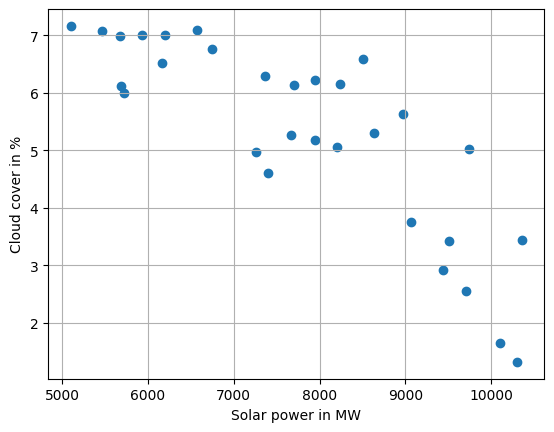

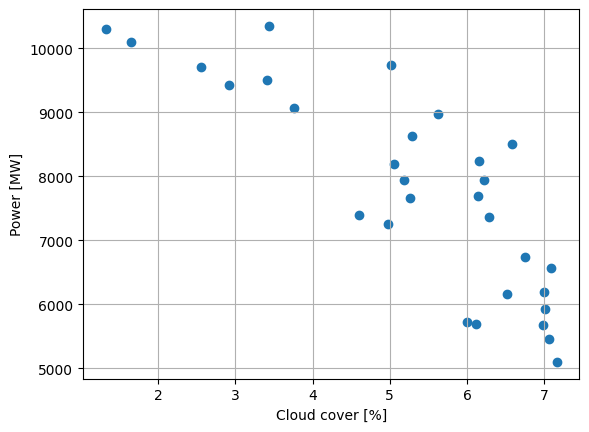

In [15]:
import pandas as pd

start_date = "2019-07-01"
end_date = "2019-07-31"

#
# Power data
#

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Filter data by start and end date
power_df = power_df[(power_df["cet_cest_timestamp"] >= start_date) & (power_df["cet_cest_timestamp"] <= end_date)]

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

#
# Cloud data
#

cloud_df = pd.read_sql_table("cloud_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Filter data by start and end date
cloud_df = cloud_df[(cloud_df["date"] >= start_date) & (cloud_df["date"] <= end_date)]

# Replace illegal values with NA
cloud_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
cloud_df["date"] = cloud_df["date"].dt.date

# Group by date and calculate the average of the cloud cover
cloud_df = cloud_df.groupby("date")[["cloud_cover"]].mean().reset_index()

#
# Visualization
#

# Drop the entries where the date of cloud cover is missing in the power data and vice-verca
power_df = power_df[power_df["cet_cest_timestamp"].isin(cloud_df["date"])]
cloud_df = cloud_df[cloud_df["date"].isin(power_df["cet_cest_timestamp"])]

import matplotlib.pyplot as plt

print(len(power_df["DE_solar_generation_actual"]))
print(len(cloud_df["cloud_cover"]))

plt.scatter(power_df["DE_solar_generation_actual"], cloud_df["cloud_cover"])
plt.xlabel("Solar power in MW")
plt.ylabel("Cloud cover in %")
plt.grid(True)
plt.show()

plt.scatter(cloud_df["cloud_cover"], power_df["DE_solar_generation_actual"])
plt.xlabel("Cloud cover [%]")
plt.ylabel("Power [MW]")
plt.grid(True)
plt.show()

# --> There is an indication for a negative correlation between solar power and cloud cover
# --> Use more data to confirm this

# fig, axs = plt.subplots(2, figsize=(20, 10))
# fig.suptitle("Solar power and cloud cover in Germany")
# axs[0].plot(power_df["cet_cest_timestamp"], power_df["DE_solar_generation_actual"], label="Solar generation")
# axs[0].set_ylabel("Power in MW")
# axs[0].legend()
# axs[1].plot(cloud_df["date"], cloud_df["cloud_cover"], label="Cloud cover")
# axs[1].set_ylabel("Cover in %")
# axs[1].legend()
# plt.show()

# plt.figure(figsize=(20, 10))
# plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_generation_actual"], label="Solar generation")
# plt.plot(cloud_df["date"], cloud_df["cloud_cover"], label="Cloud cover")
# plt.xlabel("Date")
# plt.ylabel("Value")
# plt.title("Solar power and cloud cover in Germany")
# plt.legend()
# plt.show()

2101
2101


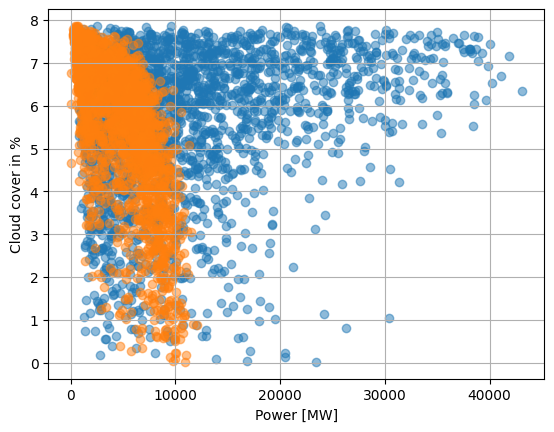

In [1]:
import pandas as pd

#
# Power data
#

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

#
# Cloud data
#

cloud_df = pd.read_sql_table("cloud_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
cloud_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
cloud_df["date"] = cloud_df["date"].dt.date

# Group by date and calculate the average of the cloud cover
cloud_df = cloud_df.groupby("date")[["cloud_cover"]].mean().reset_index()

#
# Visualization
#

# Drop the entries where the date of cloud cover is missing in the power data and vice-verca
power_df = power_df[power_df["cet_cest_timestamp"].isin(cloud_df["date"])]
cloud_df = cloud_df[cloud_df["date"].isin(power_df["cet_cest_timestamp"])]

import matplotlib.pyplot as plt

print(len(power_df["DE_solar_generation_actual"]))
print(len(cloud_df["cloud_cover"]))

plt.scatter(power_df["DE_wind_generation_actual"], cloud_df["cloud_cover"], label="Wind", alpha=0.5)
plt.scatter(power_df["DE_solar_generation_actual"], cloud_df["cloud_cover"], label="Solar", alpha=0.5)
plt.xlabel("Power [MW]")
plt.ylabel("Cloud cover in %")
plt.grid(True)
plt.show()

# --> way better

# -> the less cloud clover the more solar power is generated
# -> the more cloud cover the more potential for more wind power

### Temperature data

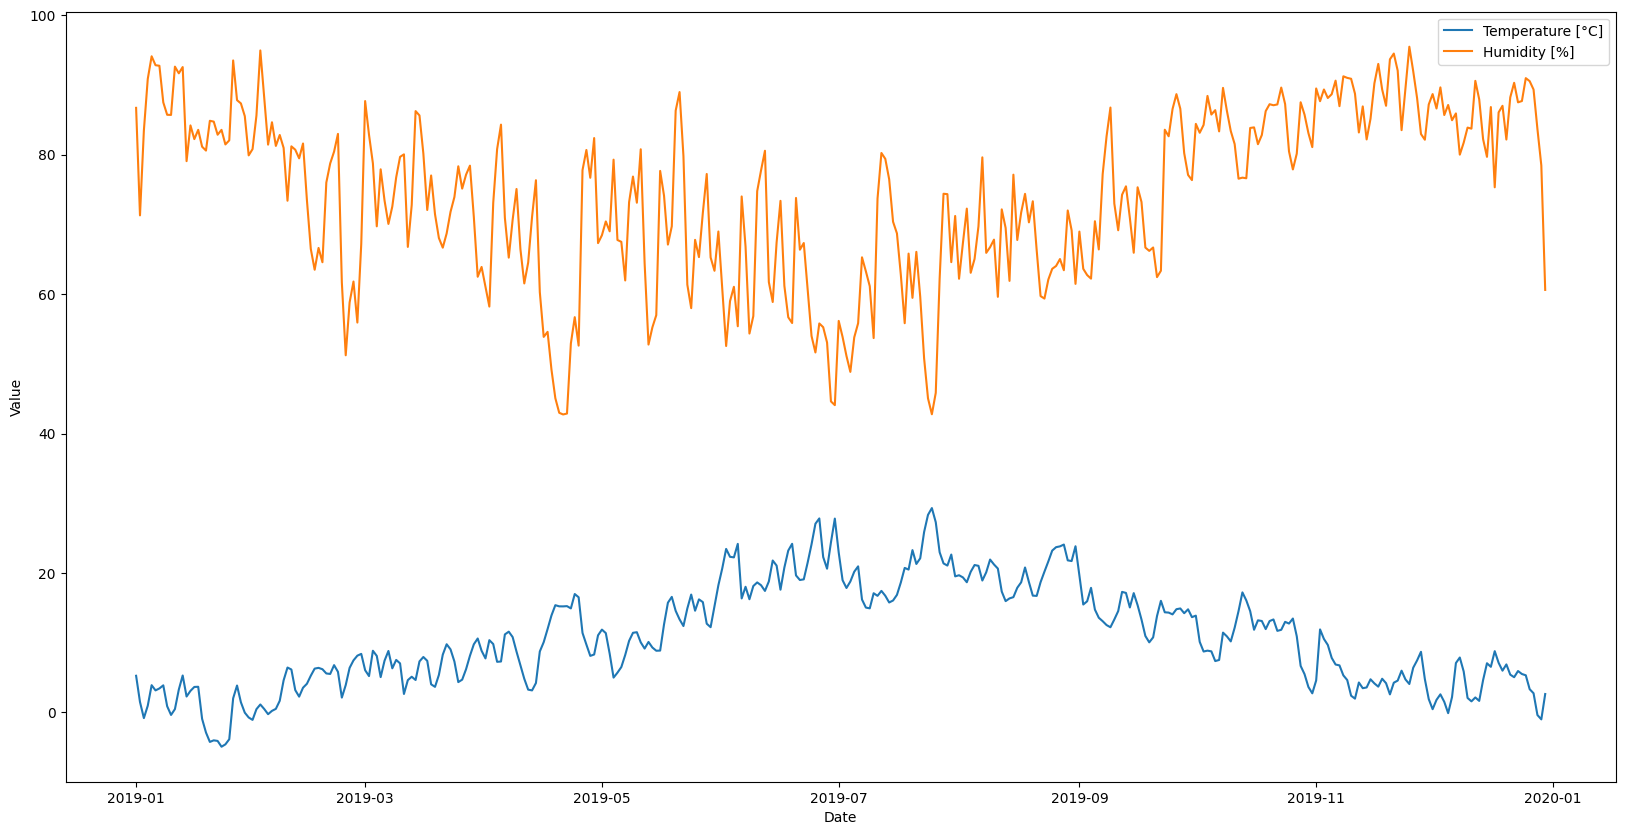

In [27]:
temperature_df = pd.read_sql_table("temperature_data", "sqlite:///data/processed_data/transformed_data.sqlite")

start_date: str = "2019-01-01"
end_date: str = "2019-12-31"

# Filter data by start and end date
temperature_df = temperature_df[(temperature_df["date"] >= start_date) & (temperature_df["date"] <= end_date)]

# Replace illegal values with NA
temperature_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
temperature_df["date"] = temperature_df["date"].dt.date

# Group by date and calculate the average temperature in Germany
temperature_df = temperature_df.groupby("date")[["temperature", "humidity"]].mean().reset_index()
plt.figure(figsize=(20, 10))
plt.plot(temperature_df["date"], temperature_df["temperature"], label="Temperature [°C]")
plt.plot(temperature_df["date"], temperature_df["humidity"], label="Humidity [%]")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# --> Temperature and humidity are inversely proportional
# --> Temperature and solar power are correlated
# --> Scatterplot for better visualisation of correlation to power

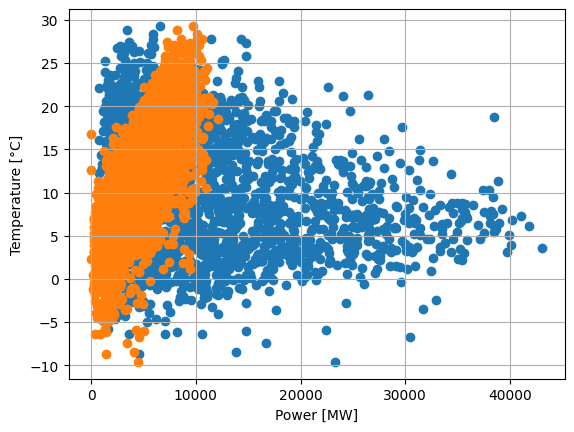

In [10]:
import pandas as pd

#
# Power data
#

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

#
# Temperature data
#

temperature_df = pd.read_sql_table("temperature_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
temperature_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
temperature_df["date"] = temperature_df["date"].dt.date

# Group by date and calculate the average temperature in Germany
temperature_df = temperature_df.groupby("date")[["temperature", "humidity"]].mean().reset_index()

#
# Visualization
#

# Drop bad entries
power_df = power_df[power_df["cet_cest_timestamp"].isin(temperature_df["date"])]
temperature_df = temperature_df[temperature_df["date"].isin(power_df["cet_cest_timestamp"])]

import matplotlib.pyplot as plt

plt.scatter(power_df["DE_wind_generation_actual"], temperature_df["temperature"], label="Wind")
plt.scatter(power_df["DE_solar_generation_actual"], temperature_df["temperature"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("Temperature [°C]")
plt.grid(True)
plt.show()

# --> correlation between temperature and solar power
# --> the warmer it is, the more solar power is generated

## -> there is a coridor of temperature where wind is optimal (0 - 10 °C)

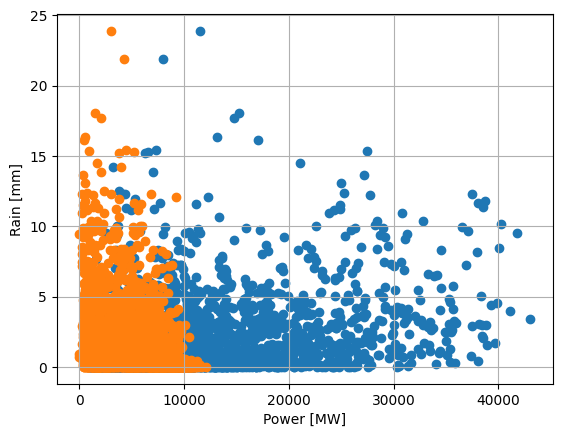

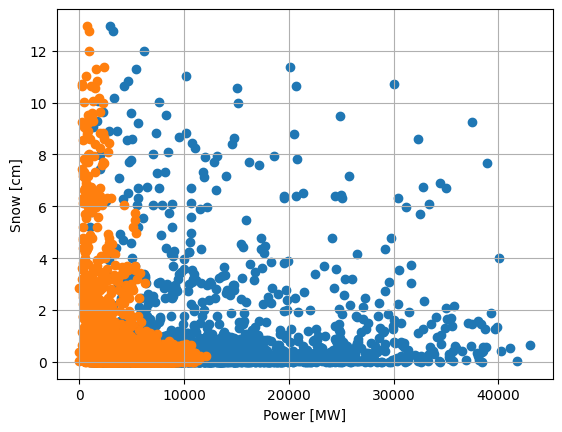

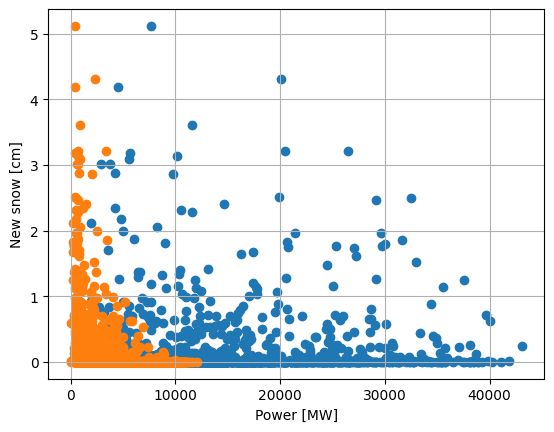

In [9]:
# lets do some rain data


# --> Scatterplot for better visualisation of correlation to power
import pandas as pd

#
# Power data
#

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

#
# Rain data
#

rain_df = pd.read_sql_table("rain_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
rain_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
rain_df["date"] = rain_df["date"].dt.date

# Remove bad data
drop_codes = {
    4: pd.NA,  # Form of precipitation not known, although precipitation reported
    9: pd.NA,  # Misidentification; missing value or precipitation form not detectable with automatic measurement
}
rain_df["rain_form"] = rain_df["rain_form"].replace(drop_codes)

# Aggregate data
def mode_without_zero(x):
    x = x[x != 0]
    return x.mode() if not x.empty else pd.NA

aggregations = {
    "rain": "mean",
    "rain_form": mode_without_zero,
    "snow_height": "mean",
    "new_snow_height": "mean",
}

# Group by date and calculate the average precipitation
rain_df = rain_df.groupby("date").agg(aggregations).reset_index()

#
# Visualization
#

# Drop bad entries
power_df = power_df[power_df["cet_cest_timestamp"].isin(rain_df["date"])]
rain_df = rain_df[rain_df["date"].isin(power_df["cet_cest_timestamp"])]

import matplotlib.pyplot as plt

plt.scatter(power_df["DE_wind_generation_actual"], rain_df["rain"], label="Wind")
plt.scatter(power_df["DE_solar_generation_actual"], rain_df["rain"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("Rain [mm]")
plt.grid(True)
plt.show()

plt.scatter(power_df["DE_wind_generation_actual"], rain_df["snow_height"], label="Wind")
plt.scatter(power_df["DE_solar_generation_actual"], rain_df["snow_height"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("Snow [cm]")
plt.grid(True)
plt.show()

plt.scatter(power_df["DE_wind_generation_actual"], rain_df["new_snow_height"], label="Wind")
plt.scatter(power_df["DE_solar_generation_actual"], rain_df["new_snow_height"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("New snow [cm]")
plt.grid(True)
plt.show()

# -> precipitation means less solar power

# -> wind power is not affected by precipitation

666
666


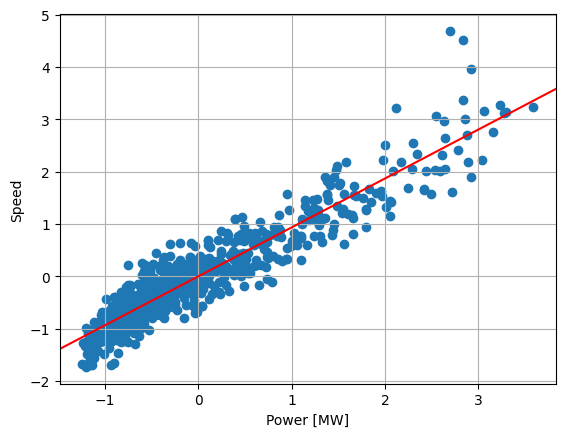

In [19]:
# lets do some wind data


import pandas as pd

#
# Power data
#

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

#
# Wind data
#

wind_df = pd.read_sql_table("wind_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
wind_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
wind_df["date"] = wind_df["date"].dt.date

# Group by date and calculate the average wind speed in Germany
wind_df = wind_df.groupby("date")[["speed"]].mean().reset_index()

#
# Visualization
#

# Drop bad entries
power_df = power_df[power_df["cet_cest_timestamp"].isin(wind_df["date"])]
wind_df = wind_df[wind_df["date"].isin(power_df["cet_cest_timestamp"])]

import matplotlib.pyplot as plt
import numpy as np

# m, b = np.polyfit(power_df["DE_wind_generation_actual"].astype(np.float64), wind_df["speed"].astype(np.float64), deg=1)
# plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')


# Preprocess and normalize the input data
x = power_df["DE_wind_generation_actual"].astype(np.float64)
y = wind_df["speed"].astype(np.float64)

x = x[:666]
y = y[:666]

print(len(x))
print(len(y))

x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)



# Perform linear regression
m = np.polyfit(x, y, deg=1)

plt.axline(xy1=(0, m[1]), slope=m[0], label=f'$y = {m[0]:.1f}x {m[1]:+.1f}$', color="red")


plt.scatter(x, y, label="Wind")
# plt.scatter(power_df["DE_wind_generation_actual"], wind_df["speed"], label="Wind")
# plt.scatter(power_df["DE_solar_generation_actual"], wind_df["speed"], label="Solar")
plt.xlabel("Power [MW]")
plt.ylabel("Speed")
plt.grid(True)
plt.show()

# -> the more wind the less solar
# -> the more wind the more wind power

# --------------------------

2101
4749


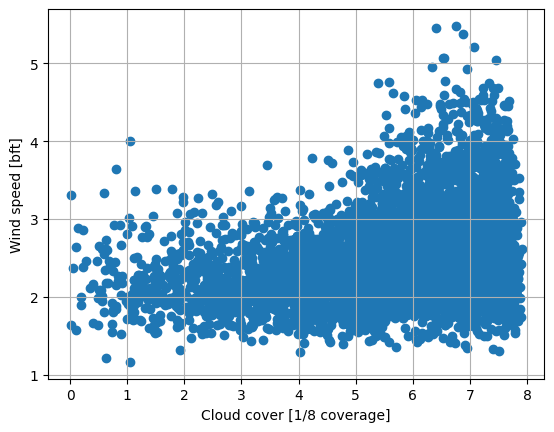

In [2]:
import pandas as pd

#
# Cloud data
#

cloud_df = pd.read_sql_table("cloud_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
cloud_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
cloud_df["date"] = cloud_df["date"].dt.date

# Group by date and calculate the average of the cloud cover
cloud_df = cloud_df.groupby("date")[["cloud_cover"]].mean().reset_index()

#
# Wind data
#

wind_df = pd.read_sql_table("wind_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
wind_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
wind_df["date"] = wind_df["date"].dt.date

# Group by date and calculate the average wind speed in Germany
wind_df = wind_df.groupby("date")[["speed"]].mean().reset_index()

#
# Visualization
#

# Drop the entries where the date of cloud cover is missing in the wind speed data and vice-verca
cloud_df = cloud_df[cloud_df["date"].isin(wind_df["date"])]
wind_df = wind_df[wind_df["date"].isin(cloud_df["date"])]

import matplotlib.pyplot as plt

print(len(power_df["DE_solar_generation_actual"]))
print(len(cloud_df["cloud_cover"]))

plt.scatter(cloud_df["cloud_cover"], wind_df["speed"])
plt.xlabel("Cloud cover [1/8 coverage]")
plt.ylabel("Wind speed [bft]")
plt.grid(True)
plt.show()

# -> the more clouds the more wind

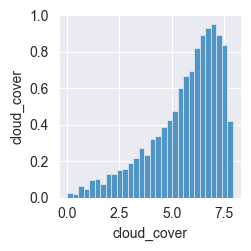

In [4]:
import pandas as pd
import seaborn as sns

#
# Cloud data
#

cloud_df = pd.read_sql_table("cloud_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
cloud_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
cloud_df["date"] = cloud_df["date"].dt.date

# Group by date and calculate the average of the cloud cover
cloud_df = cloud_df.groupby("date")[["cloud_cover"]].mean().reset_index()

#
# Wind data
#

wind_df = pd.read_sql_table("wind_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
wind_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
wind_df["date"] = wind_df["date"].dt.date

# Group by date and calculate the average wind speed in Germany
wind_df = wind_df.groupby("date")[["speed"]].mean().reset_index()

#
# Visualization
#

# Drop the entries where the date of cloud cover is missing in the wind speed data and vice-verca
cloud_df = cloud_df[cloud_df["date"].isin(wind_df["date"])]
wind_df = wind_df[wind_df["date"].isin(cloud_df["date"])]



sns.pairplot(cloud_df)